In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_1 = os.path.join("C:\Projects", "huboo", "data", "top_down_pick_and_pack_detection.csv.txt")
data = pd.read_csv(path_1)

path_2 = os.path.join("C:\Projects", "huboo", "data", "associations_top_down_pick_and_pack.csv.txt")
tracklets = pd.read_csv(path_2)

In [3]:
#Manually fix ReId errors
#Man = 1, woman = 2
#21 -> 2

tracklets[" person_id"][7] = 2

In [4]:
pd.set_option('display.max_rows', 10000)

In [83]:
TRUNC = 2000
data2 = data.truncate(before=TRUNC, after=len(data)-TRUNC).reset_index()

data2.describe()

,index,frame,tracklet_id,l,t,w,h,probability_of_detection
count,73988.000000,73988.000000,73988.000000,73988.000000,73988.000000,73988.000000,73988.000000,73988.000000
mean,38993.500000,19817.677515,42.393861,1122.517798,450.787224,186.144929,314.321350,0.829074
std,21358.640195,10192.880896,31.751493,347.353991,109.402040,29.509843,42.775409,0.127185
min,2000.000000,1896.000000,1.000000,-40.050000,-208.390000,83.080000,125.190000,0.100000
25%,20496.750000,11331.000000,21.000000,900.207500,447.740000,170.130000,295.160000,0.840000
50%,38993.500000,19574.500000,24.000000,1216.620000,478.090000,183.720000,320.120000,0.870000
75%,57490.250000,28416.000000,74.000000,1412.160000,490.310000,200.820000,340.750000,0.880000
max,75987.000000,37654.000000,109.000000,1731.450000,833.850000,382.440000,656.900000,0.960000


In [6]:
identity = pd.merge(data, tracklets, on='tracklet_id', how='left')

person_1 = identity[identity[" person_id"] == 1.0]
person_1 = person_1.reset_index()

person_2 = identity[identity[" person_id"] == 2.0]
person_2 = person_2.reset_index()

identity[" person_id"].value_counts()

2.0    36542
1.0    34393
4.0      969
3.0      324
Name:  person_id, dtype: int64

In [7]:
#Truncate data, clips ends off ~1200 each end, the time it took to reach the top of the forklift.
TRUNC = 1200
person_1 = person_1.truncate(before=TRUNC, after=len(person_1)-TRUNC).reset_index()
person_2 = person_2.truncate(before=TRUNC, after=len(person_2)-TRUNC).reset_index()

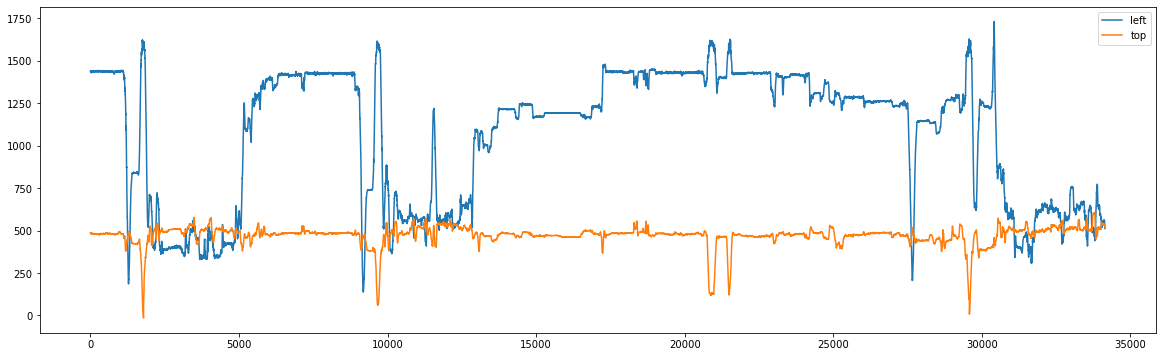

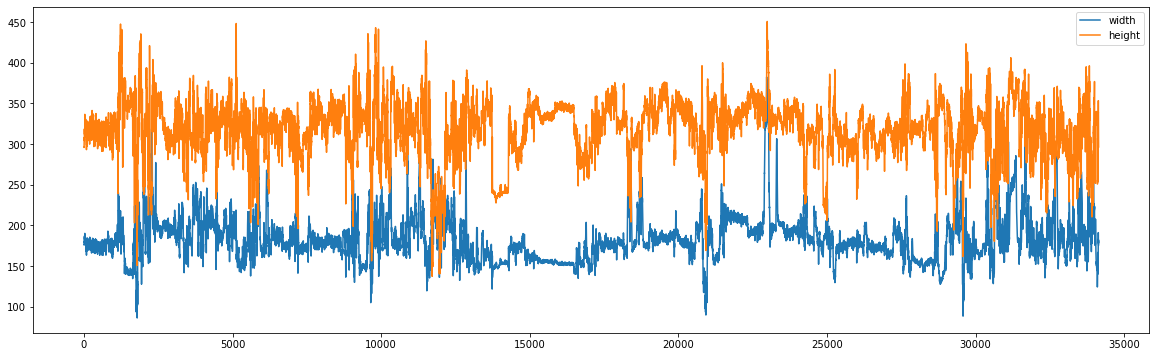

In [8]:
#Basic data plotting

PERSON = person_2

plt.rcParams["figure.figsize"] = (20,6)

plt.plot(PERSON["l"].to_list(), label = "left")
plt.plot(PERSON["t"].to_list(), label = "top")
plt.legend()
plt.show()

plt.plot(PERSON["w"].to_list(), label = "width")
plt.plot(PERSON["h"].to_list(), label = "height")
plt.legend()
plt.show()

In [9]:
#Position
#Position given by the middle bottom of the box. 
#position = (left, top) + 0.5 * (width, height)

person_1["position"] = np.array(zip(person_1["l"] + person_1["w"] / 2, person_1["t"] + person_1["h"] / 2))
person_1["x"] = person_1["l"] + person_1["w"] / 2
person_1["y"] = person_1["t"] + person_1["h"] / 2

person_2["position"] = np.array(zip(person_2["l"] + person_2["w"] / 2, person_2["t"] + person_2["h"] / 2))    #Can add: [1]*len(person_1), if want to transform.
person_2["x"] = person_2["l"] + person_2["w"] / 2
person_2["y"] = person_2["t"] + person_2["h"] / 2

In [10]:
#Plots

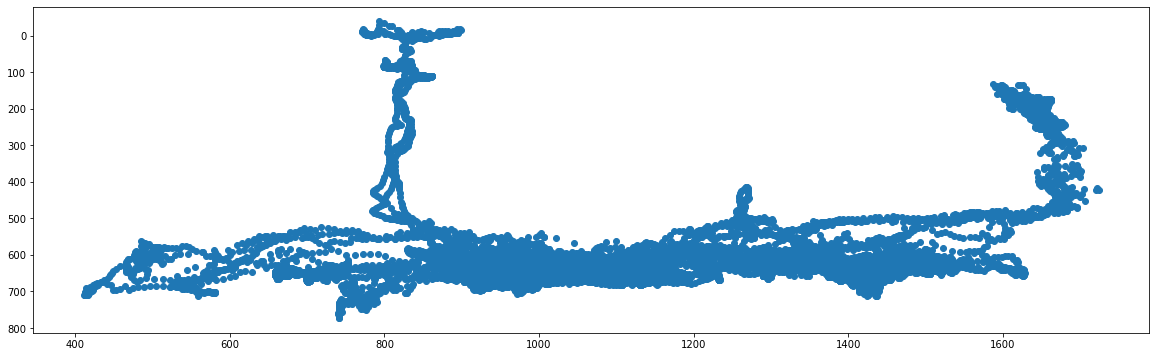

In [11]:
plt.gca().invert_yaxis()
plt.scatter(*zip(*person_1["position"]))

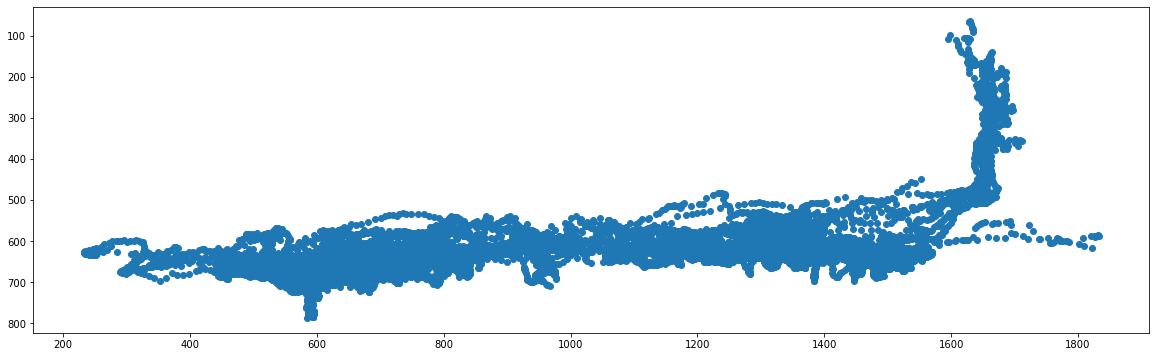

In [12]:
plt.gca().invert_yaxis()
plt.scatter(*zip(*person_2["position"]))

Now we create a heatmap

In [13]:
from scipy import stats, integrate
import seaborn as sns

In [14]:
plt.rcParams["figure.figsize"] = (12.8,7.2)
plt.rcParams["figure.dpi"] = (150)

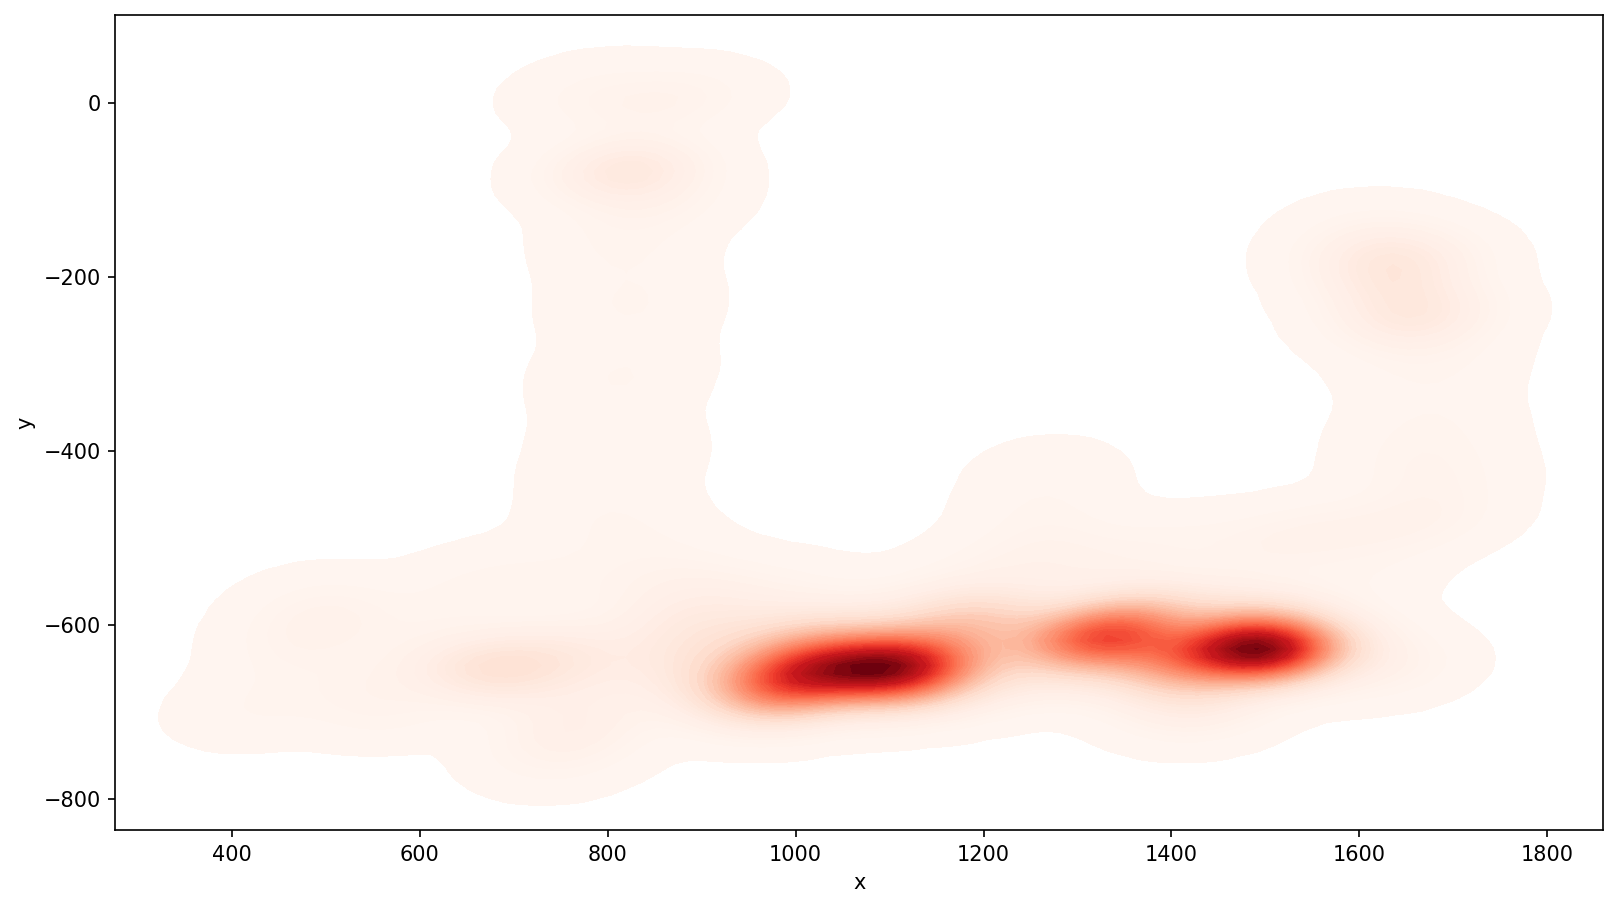

In [15]:
# call the kernel density estimator function
ax = sns.kdeplot(x=person_1["x"], y=-person_1["y"], bw_method = 'scott', cmap="Reds", n_levels = 50, shade=True, thresh=0.001, gridsize=100)

In [16]:
from PIL import Image 
from numpy import asarray
import cv2

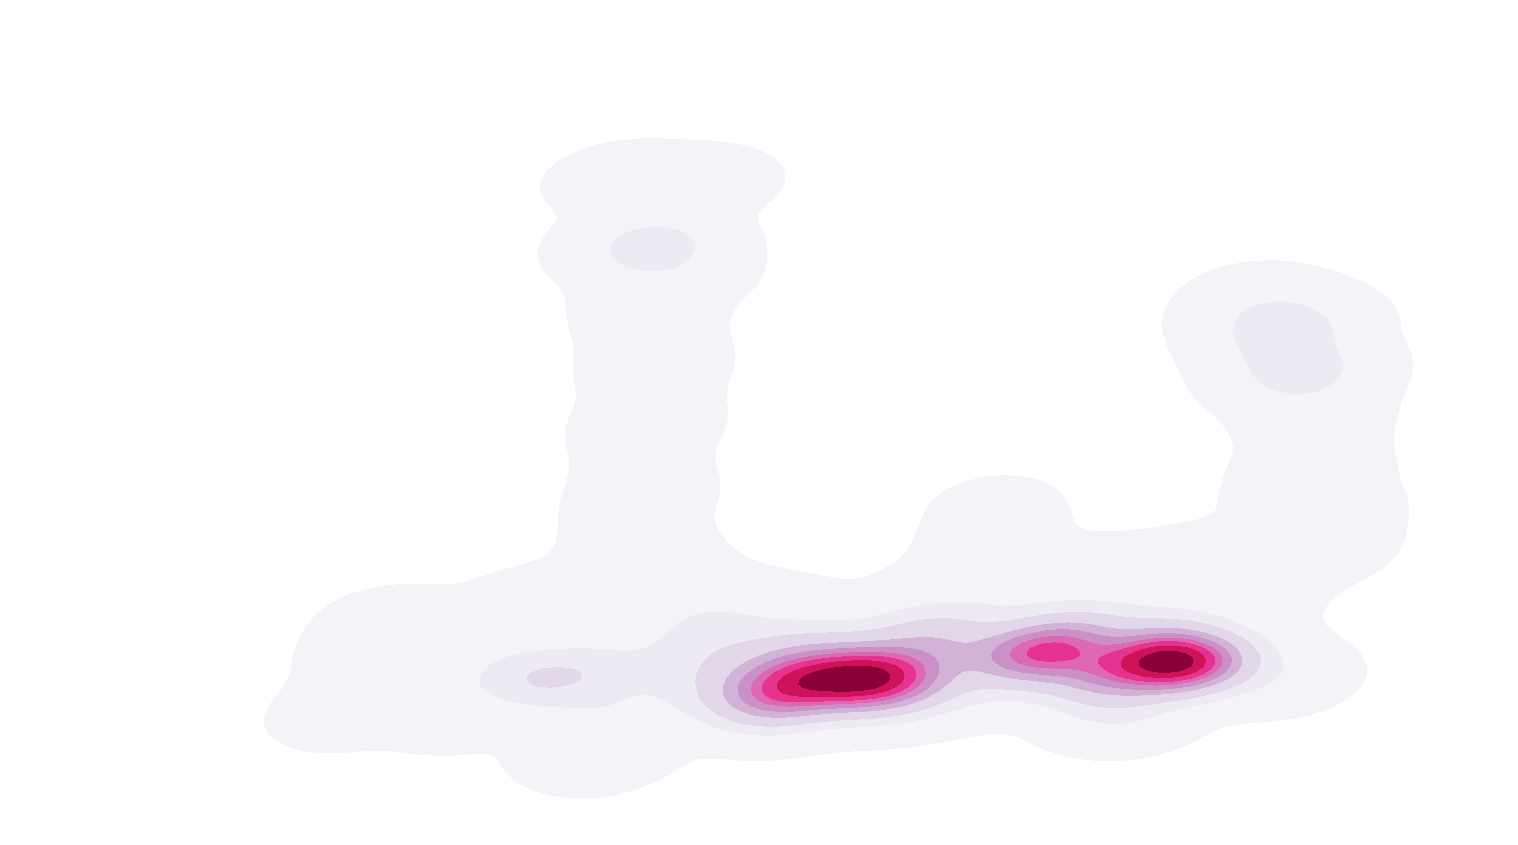

In [17]:
plt.xlim(0, 1920)
plt.ylim(0, 1080)
#plt.axis('off')
#plt.title("Person 1 Heatmap")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

plt.box(False)


img = sns.kdeplot(x=person_1["x"], y=850-person_1["y"], cmap="PuRd", shade=True, thresh=0.001)

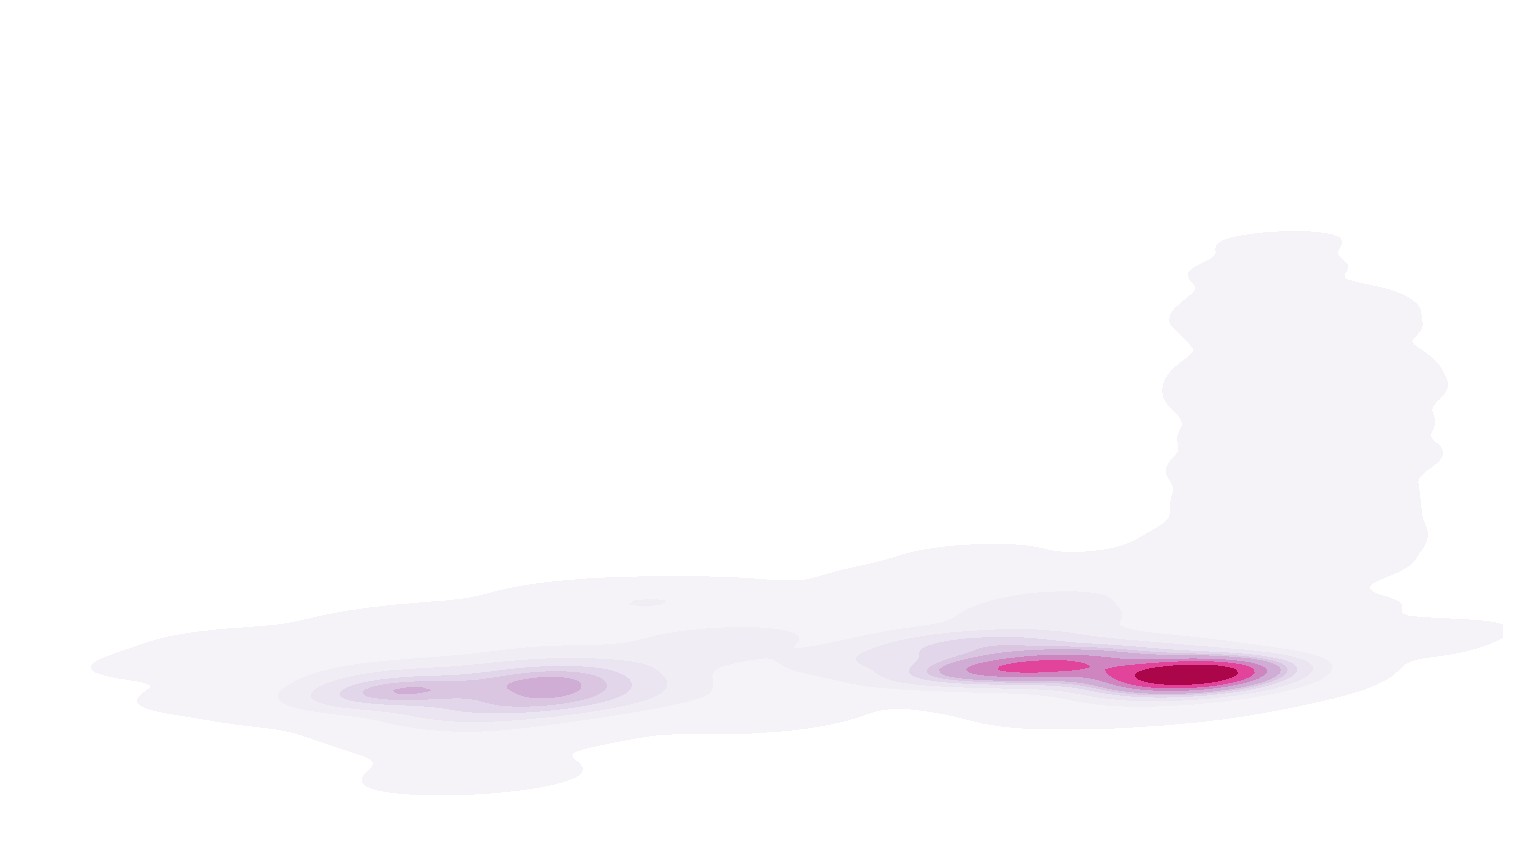

In [18]:
plt.xlim(0, 1920)
plt.ylim(0, 1080)
#plt.axis('off')
#plt.title("Person 2 Heatmap")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

plt.box(False)

img = sns.kdeplot(x=person_2["x"], y=850-person_2["y"], cmap="PuRd", shade=True, thresh=0.001)

In [19]:
# Combining position coordinates
people_x = person_1["x"].tolist() + person_2["x"].tolist()
people_y = person_1["y"].tolist() + person_2["y"].tolist()
people_y = np.subtract([850]*len(people_y), people_y)

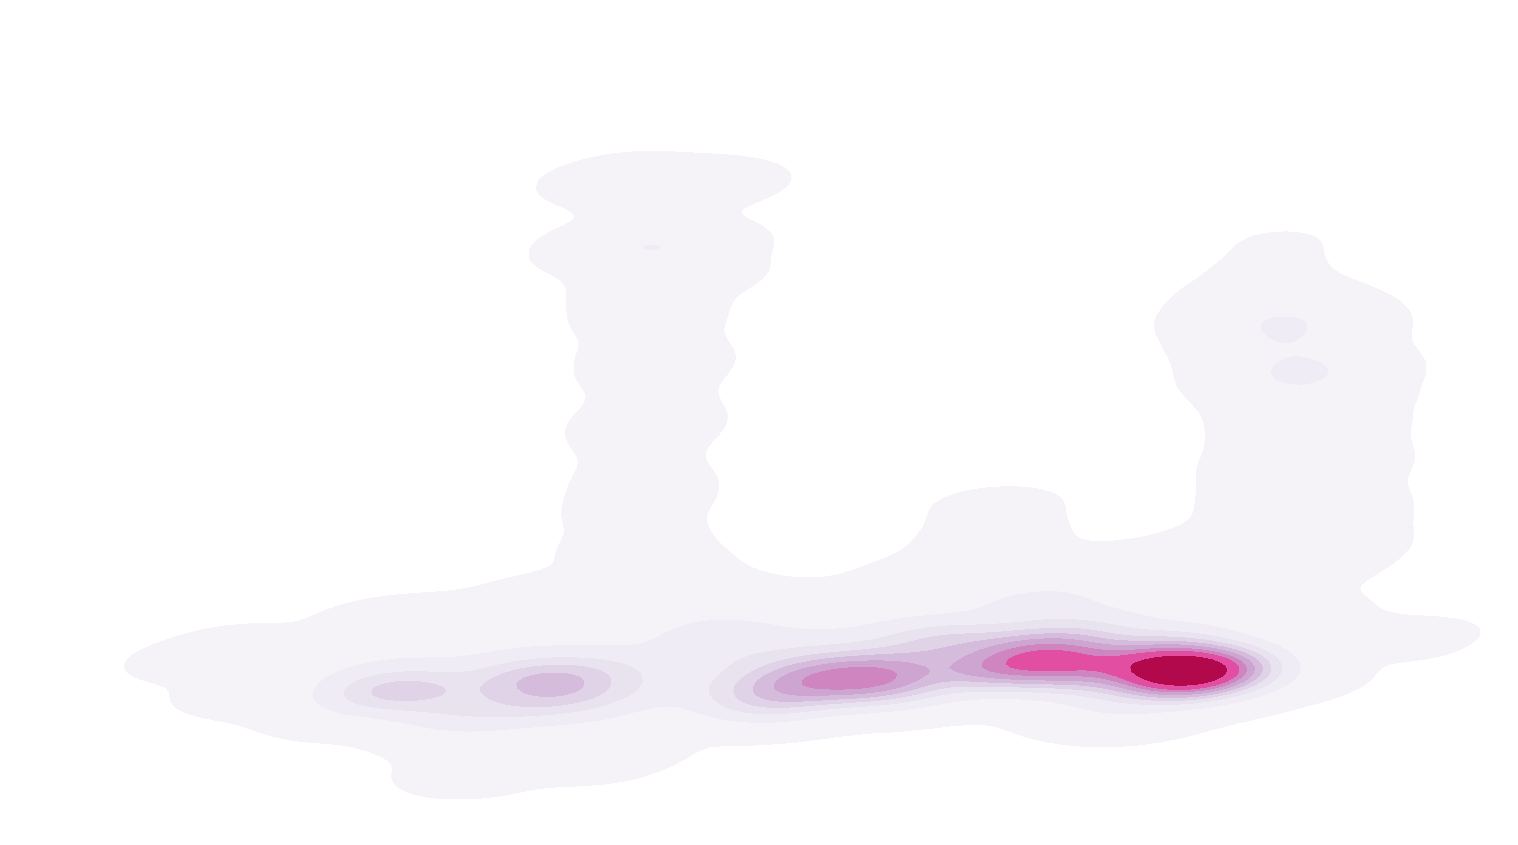

In [20]:
plt.xlim(0, 1920)
plt.ylim(0, 1080)
#plt.axis('off')
#plt.title("Person 1 & Person 2 Heatmap")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

plt.box(False)

img = sns.kdeplot(x=people_x, y=people_y, cmap="PuRd", shade=True, thresh=0.001)

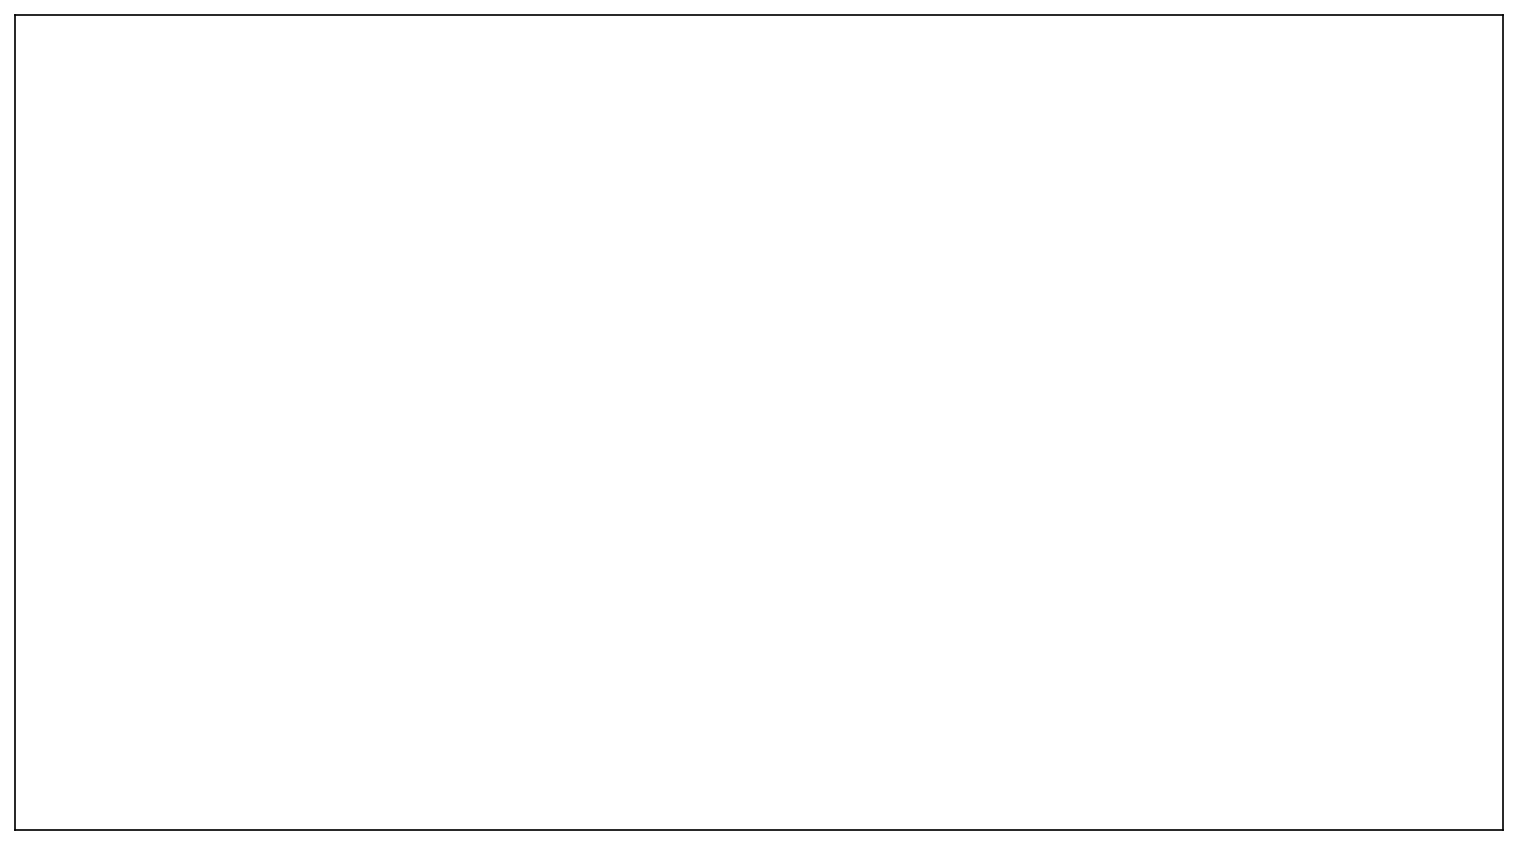

In [21]:
#Image multiplication

#Load images
img_hub = asarray(Image.open("..\data\huboo_hub.png"))
img_heat = asarray(Image.open("..\data\person_1-2_heatmap_noborder_2.png"))[:,:,:3]

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off


#Resize img_heat
img_heat = cv2.resize(img_heat, dsize=(2560,1250), interpolation=cv2.INTER_CUBIC)

In [22]:
(img_hub.shape, img_heat.shape)

((1250, 2560, 3), (1250, 2560, 3))

In [23]:
img = img_heat_as_grey_scale.reshape([*img_heat_as_grey_scale.shape, 1])

plt.imshow(cv2.addWeighted(img_hub, 1, np.multiply((255 - img_heat), np.array([5,100,0])).astype('uint8'), 2, 0))

NameError: name 'img_heat_as_grey_scale' is not defined

In [ ]:
#Image multiplication

#Load images
img_hub = asarray(Image.open("..\data\huboo_hub.png"))
img_heat = asarray(Image.open("..\data\combined_heatmap_noborder.png"))[:,:,:3]

#Resize img_heat
img_heat = cv2.resize(img_heat, dsize=(2560,1250), interpolation=cv2.INTER_CUBIC)

plt.rcParams["figure.figsize"] = (12.8,7.2)
plt.rcParams["figure.dpi"] = (150)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

#Image multiplication
plt.imshow(cv2.addWeighted(img_hub, 1, np.multiply((255 - img_heat), np.array([5,100,0])).astype('uint8'), 2, 0))

In [ ]:
#Image multiplication

#Load images
img_hub = asarray(Image.open("..\data\huboo_hub.png"))
img_heat = asarray(Image.open("..\data\person_2_heatmap_noborder.png"))[:,:,:3]

#Resize img_heat
img_heat = cv2.resize(img_heat, dsize=(2560,1250), interpolation=cv2.INTER_CUBIC)

#Image multiplication
plt.imshow(cv2.addWeighted(img_hub, 1, np.multiply((255 - img_heat), np.array([5,100,0])).astype('uint8'), 2, 0))

In [24]:
#Located at computer
#Define computer box as between x:1450 - 1600, y: 575 - 1700
#Total time under analysis was 1180 seconds.
FRAME_RATE = 29.61

In [25]:
#person_1

conditions_comp=[(1450 < person_1["x"]) & (person_1["x"] < 1600) & (575 < person_1["y"]) & (person_1["y"] < 700)]
choices_comp=[1]
person_1["computer"] = np.select(conditions_comp, choices_comp, default = 0).astype('bool')

conditions_desk=[(330 < person_1["x"]) & (person_1["x"] < 1600) & (575 < person_1["y"]) & (person_1["y"] < 700)]
choices_desk=[1]
person_1["desk"] = np.select(conditions_desk, choices_desk, default = 0).astype('bool')

In [26]:
#Computer time
person_1["computer"].value_counts()[1]/FRAME_RATE

198.7841945288754

In [27]:
#Desk time
person_1["desk"].value_counts()[1]/FRAME_RATE

954.0020263424519

In [28]:
#Non-computer desk time
(person_1["desk"].value_counts()[1] - person_1["computer"].value_counts()[1])/FRAME_RATE

755.2178318135765

In [29]:
#Percentage of time at computer was:
person_1["computer"].value_counts()[1]/(person_1["computer"].value_counts()[1] + person_1["computer"].value_counts()[0])*100

18.397199474901544

In [30]:
#person_2

conditions_comp=[(1450 < person_2["x"]) & (person_2["x"] < 1600) & (575 < person_2["y"]) & (person_2["y"] < 700)]
choices_comp=[1]
person_2["computer"] = np.select(conditions_comp, choices_comp, default = 0).astype('bool')

conditions_desk=[(300 < person_2["x"]) & (person_2["x"] < 1600) & (550 < person_2["y"]) & (person_2["y"] < 700)]
choices_desk=[1]
person_2["desk"] = np.select(conditions_desk, choices_desk, default = 0).astype('bool')

In [31]:
person_2["computer"].value_counts()[1]/FRAME_RATE

361.2968591691996

In [32]:
person_2["desk"].value_counts()[1]/FRAME_RATE

1082.4721377912867

In [33]:
#Non-computer desk time
(person_2["desk"].value_counts()[1] - person_2["computer"].value_counts()[1])/FRAME_RATE

721.1752786220871

In [34]:
#Duration is 20:52 - 1:12 = 19:40 = 1180 seconds
#Resolution 1920*1080
FRAME_RATE = 29.61

In [35]:
#Percentage of time at computer was:
person_2["computer"].value_counts()[1]/(person_2["computer"].value_counts()[1] + person_2["computer"].value_counts()[0])*100

31.332923293207976

In [36]:
#Aisle Walk

In [37]:
#No. aisle walks
aisle_1 = person_1[person_1["y"] < 425]
aisle_2 = person_2[person_2["y"] < 425]

In [38]:
#No. aisle walks
(len(aisle_1.groupby(aisle_1.index.to_series().diff().ne(1).cumsum()).groups), 
 len(aisle_2.groupby(aisle_2.index.to_series().diff().ne(1).cumsum()).groups))

(6, 5)

In [39]:
a_dict_1 = aisle_1.groupby(aisle_1.index.to_series().diff().ne(1).cumsum()).groups
a_dict_2 = aisle_2.groupby(aisle_2.index.to_series().diff().ne(1).cumsum()).groups

In [40]:
#Length of aisle walks

lengths_1 = np.array([len(aisle_walk) for aisle_walk in a_dict_1.values()])
lengths_2 = np.array([len(aisle_walk) for aisle_walk in a_dict_2.values()])

#(sum(lengths_1)/len(lengths_1), sum(lengths_2)/len(lengths_2))

In [41]:
#Duration of aisle walks
#Person (1, 2)
(lengths_1, lengths_2)

(array([   4,  133,   90, 1248,   12,  584]), array([102, 124, 215,  91, 117]))

In [42]:
#Which aisle?
from itertools import groupby

person_1[person_1["frame"] == 33377]

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk
28270,29470,67087,33377,91,1171.33,246.19,179.71,359.01,0.93,1.0,"(1261.185, 425.695)",1261.185,425.695,False,False


In [43]:
#Define the different aisles, including the back horizontal aisle.

conditions_comp_1=[(700 < person_1["x"]) & (person_1["x"] < 900) & (20 < person_1["y"]) & (person_1["y"] < 400)]
choices_comp_1=[1]
person_1["aisle_2"] = np.select(conditions_comp_1, choices_comp_1, default = 0).astype('bool')

conditions_comp_2=[(1100 < person_1["x"]) & (person_1["x"] < 1300) & (100 < person_1["y"]) & (person_1["y"] < 425)]
choices_comp_2=[1]
person_1["aisle_3"] = np.select(conditions_comp_2, choices_comp_2, default = 0).astype('bool')

conditions_comp_3=[(1500 < person_1["x"]) & (person_1["x"] < 1800) & (20 < person_1["y"]) & (person_1["y"] < 390)]
choices_comp_3=[1]
person_1["aisle_4"] = np.select(conditions_comp_3, choices_comp_3, default = 0).astype('bool')

conditions_comp_4=[(0 < person_1["x"]) & (person_1["x"] < 1920) & (-200 < person_1["y"]) & (person_1["y"] < 20)]
choices_comp_4=[1]
person_1["aisle_back"] = np.select(conditions_comp_4, choices_comp_4, default = 0).astype('bool')

In [44]:
conditions_comp=[(1500 < person_2["x"]) & (person_2["x"] < 1800) & (20 < person_2["y"]) & (person_2["y"] < 390)]
choices_comp=[1]
person_2["aisle_4"] = np.select(conditions_comp, choices_comp, default = 0).astype('bool')

In [45]:
person_1_aisle_dict = person_1.groupby(person_1["aisle_4"].index.to_series().diff().ne(1).cumsum()).groups
np.array([len(aisle_walk)*FRAME_RATE for aisle_walk in person_1_aisle_dict.values()])

array([947342.34])

In [46]:
count_aisle_4 = [sum(1 for _ in group) for _, group in groupby(person_1["aisle_4"])]
del count_aisle_4[::2]               #Dodgy code, not extensible. Removes every second element from list which happens to probbaly be False entries in this case. 
print(count_aisle_4)

count_aisle_3 = [sum(1 for _ in group) for _, group in groupby(person_1["aisle_3"])]
del count_aisle_3[::2]                #Dodgy code, not extensible. Removes every second element from list which happens to probbaly be False entries in this case. 
print(count_aisle_3)

count_aisle_2 = [sum(1 for _ in group) for _, group in groupby(person_1["aisle_2"])]
del count_aisle_2[::2]                #Dodgy code, not extensible. Removes every second element from list which happens to probbaly be False entries in this case. 
print(count_aisle_2)

[116, 72, 982]
[12]
[104, 571]


In [47]:
count_aisle_4_2 = [sum(1 for _ in group) for _, group in groupby(person_2["aisle_4"])]
del count_aisle_4_2[::2]  
count_aisle_4_2
#count_aisle_4_2_time = np.array(count_aisle_4_2) / FRAME_RATE      #Doesn't include skipped frames
#count_aisle_4_2_time

[87, 110, 206, 82, 99]

In [48]:
#Approach 2 for time
person_2_aisle_4 = person_2[conditions_comp[0]]
dict_2 = person_2_aisle_4.groupby(person_2_aisle_4.index.to_series().diff().ne(1).cumsum()).groups

for elements in dict_2.values():
    print(len(elements))
    print((elements[0], elements[-1]))

87
(1729, 1815)
110
(9623, 9732)
206
(20803, 21008)
82
(21460, 21541)
99
(29529, 29627)


In [49]:
#Person_2 aisle walk (all 4) times.
((person_2.iloc[1815]["frame"] - person_2.iloc[1729]["frame"] + 1) / FRAME_RATE,
(-person_2.iloc[8623]["frame"] + person_2.iloc[9732]["frame"] + 1) / FRAME_RATE,
(-person_2.iloc[20803]["frame"] + person_2.iloc[21008]["frame"] + 1) / FRAME_RATE,
(-person_2.iloc[21460]["frame"] + person_2.iloc[21541]["frame"] + 1) / FRAME_RATE,
(-person_2.iloc[29529]["frame"] + person_2.iloc[29627]["frame"] + 1) / FRAME_RATE)

(5.504896994258696,
 37.65619723066531,
 6.95710908476866,
 2.7693346842283013,
 22.0871327254306)

In [50]:
person_1["aisle_4"].value_counts()

False    30824
True      1170
Name: aisle_4, dtype: int64

In [51]:
person_2.iloc[29627]["frame"] - person_2.iloc[29529]["frame"]

653

In [52]:
person_1_aisle_2 = person_1[conditions_comp_1[0]]
dict_1_aisle_2 = person_1_aisle_2.groupby(person_1_aisle_2.index.to_series().diff().ne(1).cumsum()).groups

print("_______________")
print("aisle 2")

for elements in dict_1_aisle_2.values():
    print(len(elements))
    print((elements[0], elements[-1]))
    
person_1_aisle_3 = person_1[conditions_comp_2[0]]
dict_1_aisle_3 = person_1_aisle_3.groupby(person_1_aisle_3.index.to_series().diff().ne(1).cumsum()).groups

print("_______________")
print("aisle 3")

for elements in dict_1_aisle_3.values():
    print(len(elements))
    print((elements[0], elements[-1]))
    
person_1_aisle_4 = person_1[conditions_comp_3[0]]
dict_1_aisle_4 = person_1_aisle_4.groupby(person_1_aisle_4.index.to_series().diff().ne(1).cumsum()).groups

print("_______________")
print("aisle 4")

for elements in dict_1_aisle_4.values():
    print(len(elements))
    print((elements[0], elements[-1]))
    
person_1_aisle_back = person_1[conditions_comp_4[0]]
dict_1_aisle_back = person_1_aisle_back.groupby(person_1_aisle_back.index.to_series().diff().ne(1).cumsum()).groups

print("_______________")
print("aisle back")

for elements in dict_1_aisle_back.values():
    print(len(elements))
    print((elements[0], elements[-1]))

_______________
aisle 2
104
(16963, 17066)
571
(28376, 28946)
_______________
aisle 3
12
(28258, 28269)
_______________
aisle 4
116
(3881, 3996)
72
(6671, 6742)
982
(17216, 18197)
_______________
aisle back
149
(17067, 17215)


In [53]:
person_1_aisle_2

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk,aisle_2,aisle_3,aisle_4,aisle_back
16963,18163,40846,20501,33,731.62,221.79,160.53,354.70,0.94,1.0,"(811.885, 399.14)",811.885,399.140,False,False,True,False,False,False
16964,18164,40848,20502,33,731.76,218.12,161.17,356.55,0.94,1.0,"(812.345, 396.395)",812.345,396.395,False,False,True,False,False,False
16965,18165,40850,20503,33,731.07,215.11,161.93,358.20,0.94,1.0,"(812.0350000000001, 394.21000000000004)",812.035,394.210,False,False,True,False,False,False
16966,18166,40852,20504,33,730.83,211.23,162.99,361.10,0.95,1.0,"(812.325, 391.78)",812.325,391.780,False,False,True,False,False,False
16967,18167,40854,20505,33,729.65,207.35,164.60,365.69,0.94,1.0,"(811.9499999999999, 390.195)",811.950,390.195,False,False,True,False,False,False
16968,18168,40856,20506,33,729.00,204.36,165.57,369.33,0.94,1.0,"(811.785, 389.025)",811.785,389.025,False,False,True,False,False,False
16969,18169,40858,20507,33,728.80,201.60,165.79,371.60,0.95,1.0,"(811.6949999999999, 387.4)",811.695,387.400,False,False,True,False,False,False
16970,18170,40860,20508,33,728.98,198.03,165.32,372.45,0.94,1.0,"(811.64, 384.255)",811.640,384.255,False,False,True,False,False,False
16971,18171,40862,20509,33,727.80,194.04,165.83,375.75,0.94,1.0,"(810.7149999999999, 381.91499999999996)",810.715,381.915,False,False,True,False,False,False
16972,18172,40864,20510,33,724.83,190.33,166.60,378.86,0.95,1.0,"(808.13, 379.76)",808.130,379.760,False,False,True,False,False,False


In [54]:
#Person_1 aisle walks times.
print("_______________")
print("aisle 2")
print((person_1.iloc[17066]["frame"] - person_1.iloc[16963]["frame"] + 1) / FRAME_RATE)
print((person_1.iloc[28946]["frame"] - person_1.iloc[28376]["frame"] + 1) / FRAME_RATE)
print("_______________")
print("aisle 3")
print((person_1.iloc[28269]["frame"] - person_1.iloc[28258]["frame"] + 1) / FRAME_RATE)
print("_______________")
print("aisle 4")
print((person_1.iloc[3996]["frame"] - person_1.iloc[3881]["frame"] + 1) / FRAME_RATE)
print((person_1.iloc[6742]["frame"] - person_1.iloc[6671]["frame"] + 1) / FRAME_RATE)
print((person_1.iloc[18197]["frame"] - person_1.iloc[17216]["frame"] + 1) / FRAME_RATE)
print("_______________")
print("aisle back")
print((person_1.iloc[17215]["frame"] - person_1.iloc[17067]["frame"] + 1) / FRAME_RATE)

_______________
aisle 2
3.5123269165822357
19.351570415400204
_______________
aisle 3
0.40526849037487334
_______________
aisle 4
18.06822019587977
38.196555217831815
33.164471462343805
_______________
aisle back
5.032083755488011


In [55]:
person_1.tail(5)

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk,aisle_2,aisle_3,aisle_4,aisle_back
31989,33189,74656,37126,91,765.65,480.35,172.73,347.46,0.87,1.0,"(852.015, 654.08)",852.015,654.080,False,True,False,False,False,False
31990,33190,74658,37127,91,767.65,480.46,171.87,346.04,0.86,1.0,"(853.585, 653.48)",853.585,653.480,False,True,False,False,False,False
31991,33191,74660,37128,91,769.41,480.95,172.20,347.27,0.85,1.0,"(855.51, 654.585)",855.510,654.585,False,True,False,False,False,False
31992,33192,74662,37129,91,772.60,482.03,171.72,347.27,0.85,1.0,"(858.46, 655.665)",858.460,655.665,False,True,False,False,False,False
31993,33193,74664,37130,91,774.13,482.89,171.79,348.13,0.85,1.0,"(860.025, 656.9549999999999)",860.025,656.955,False,True,False,False,False,False


In [80]:
person_1["aisle_2"].value_counts()#+person_1["aisle_3"].value_counts()+person_1["aisle_4"].value_counts()+person_1["aisle_back"].value_counts()

False    31319
True       675
Name: aisle_2, dtype: int64

In [56]:
person_1["frame"].tolist()[-1] - person_1["frame"].tolist()[0]

35071

<BarContainer object of 4 artists>

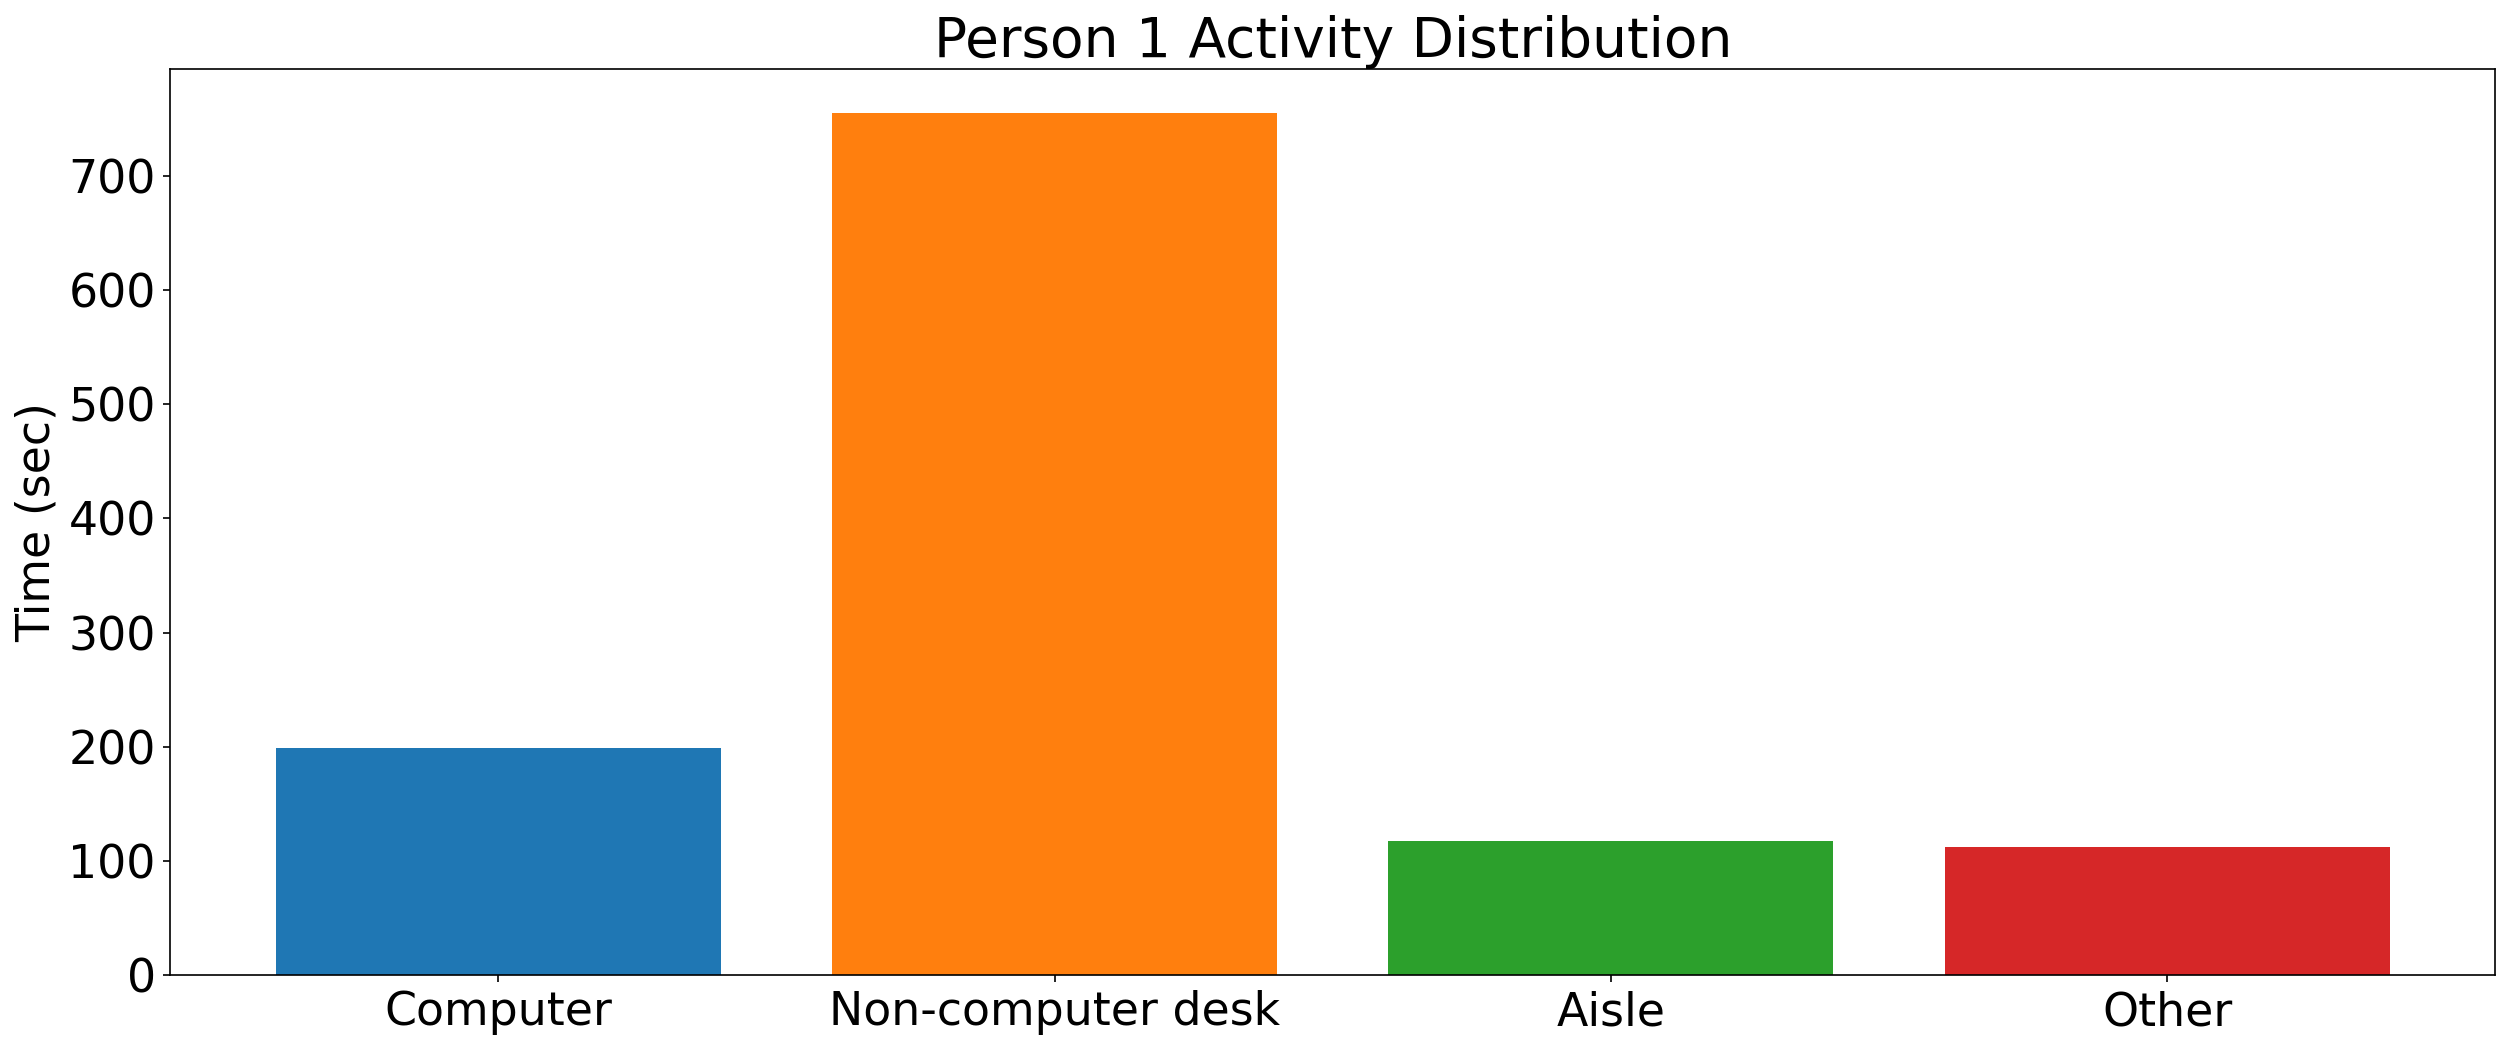

In [57]:
#Person 1 activity plots

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

frames_1 = person_1["frame"].tolist()[-1] - person_1["frame"].tolist()[0]
time_1 = 3.5123 + 19.351570415400204 + 0.40526 + 18.068+38.19655+33.16447+5.032

activites_1 = ["Computer", "Non-computer desk", "Aisle", "Other"]
times_1 = [person_1["computer"].value_counts()[1]/FRAME_RATE,
           person_1["desk"].value_counts()[1]/FRAME_RATE - person_1["computer"].value_counts()[1]/FRAME_RATE,
           time_1, 
           (frames_1 - person_1["desk"].value_counts()[1] -  time_1*FRAME_RATE)/FRAME_RATE]
colours = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']

plt.title("Person 1 Activity Distribution")
plt.ylabel("Time (sec)")
plt.bar(activites_1, times_1, color=colours)

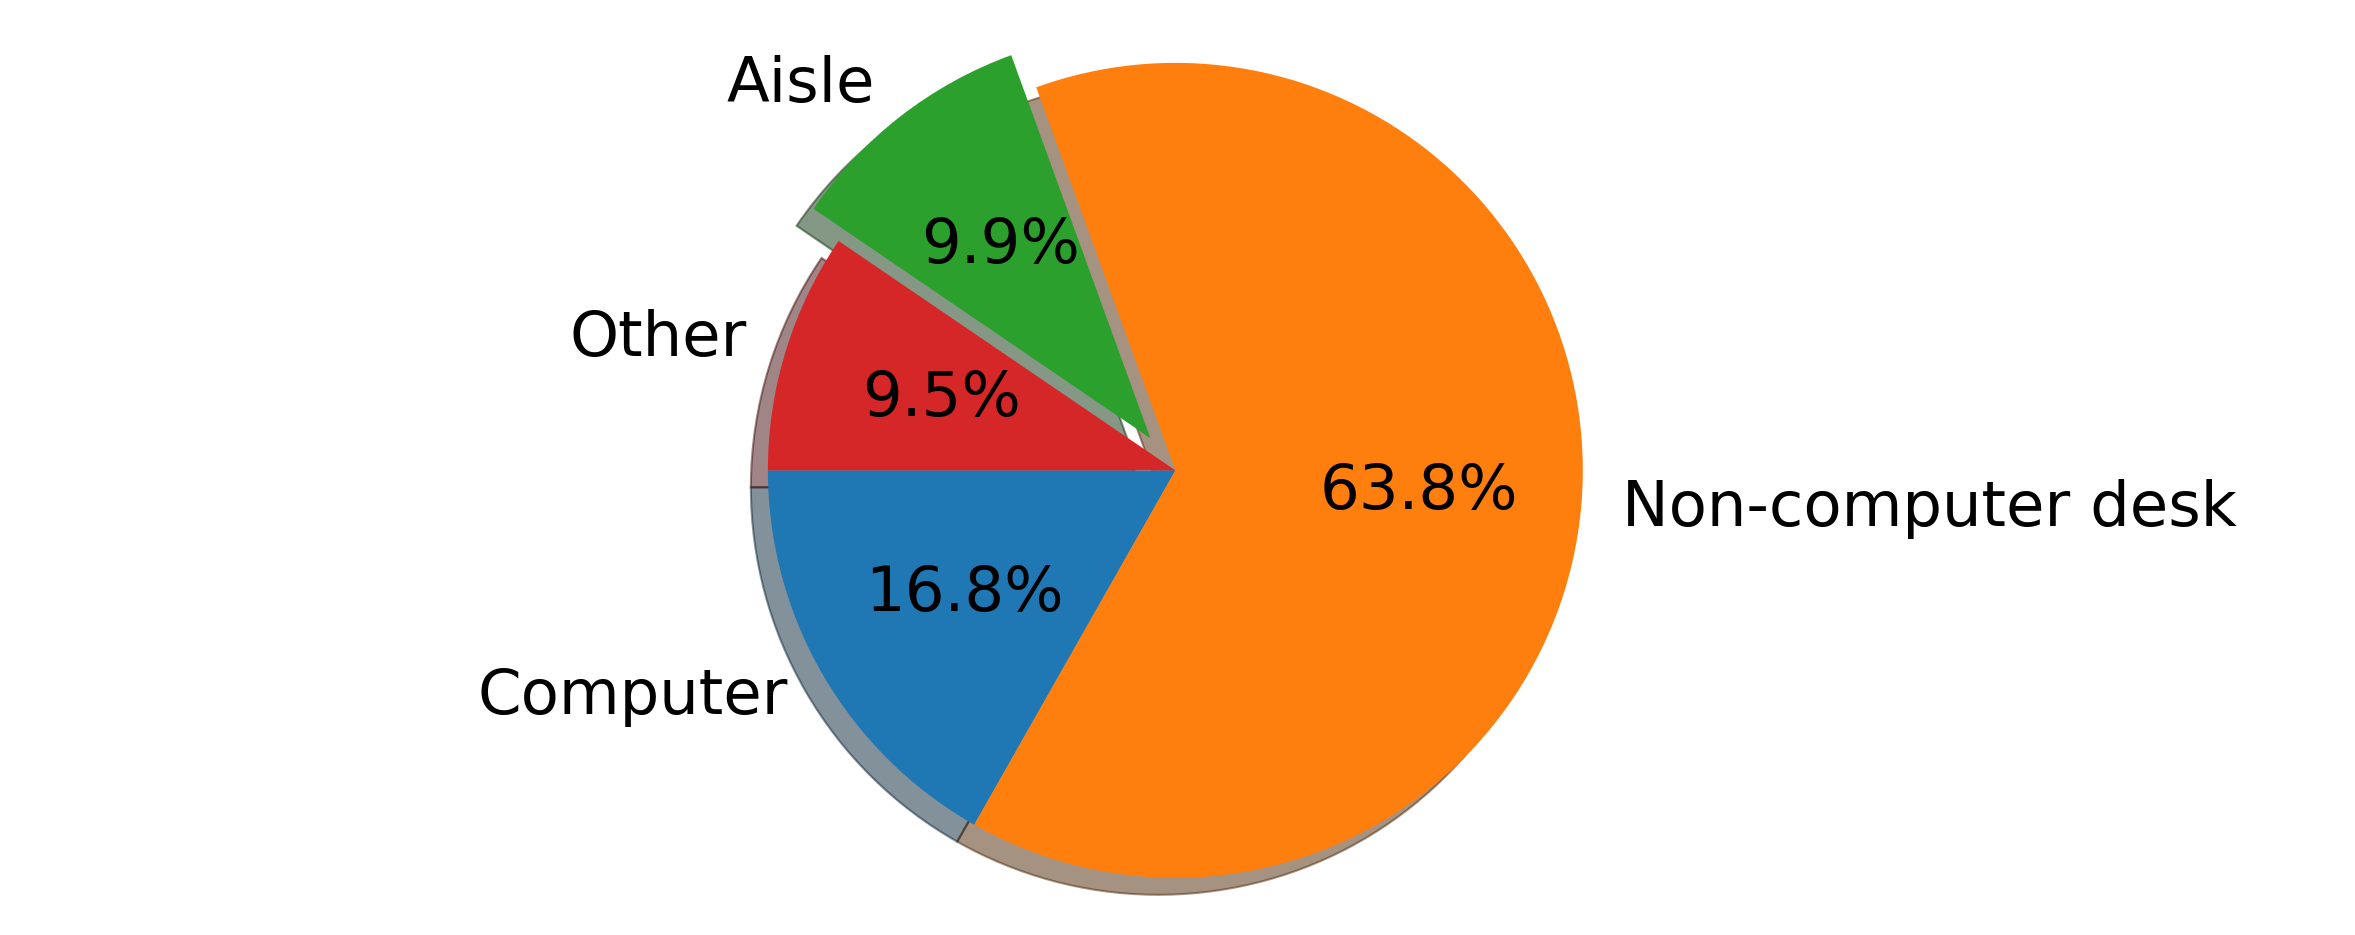

In [58]:
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 30})

fig1, ax1 = plt.subplots()
ax1.pie(times_1, explode=explode, labels=activites_1, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [59]:
print("The total time \033[4mperson 1\033[0m spent at the desk was {:.2f} seconds of which {:.2f} seconds, or {:.2f}% of this time was spent at the computer.".format(person_1["desk"].value_counts()[1]/FRAME_RATE, person_1["computer"].value_counts()[1]/FRAME_RATE, person_1["computer"].value_counts()[1]/person_1["desk"].value_counts()[1]*100))
print("\033[4mPerson 1\033[0m had a total number of {} aisle walks which combined lasted a total of {:.2f} seconds".format(6, time_1))

The total time person 1 spent at the desk was 954.00 seconds of which 198.78 seconds, or 20.84% of this time was spent at the computer.
Person 1 had a total number of 6 aisle walks which combined lasted a total of 117.73 seconds


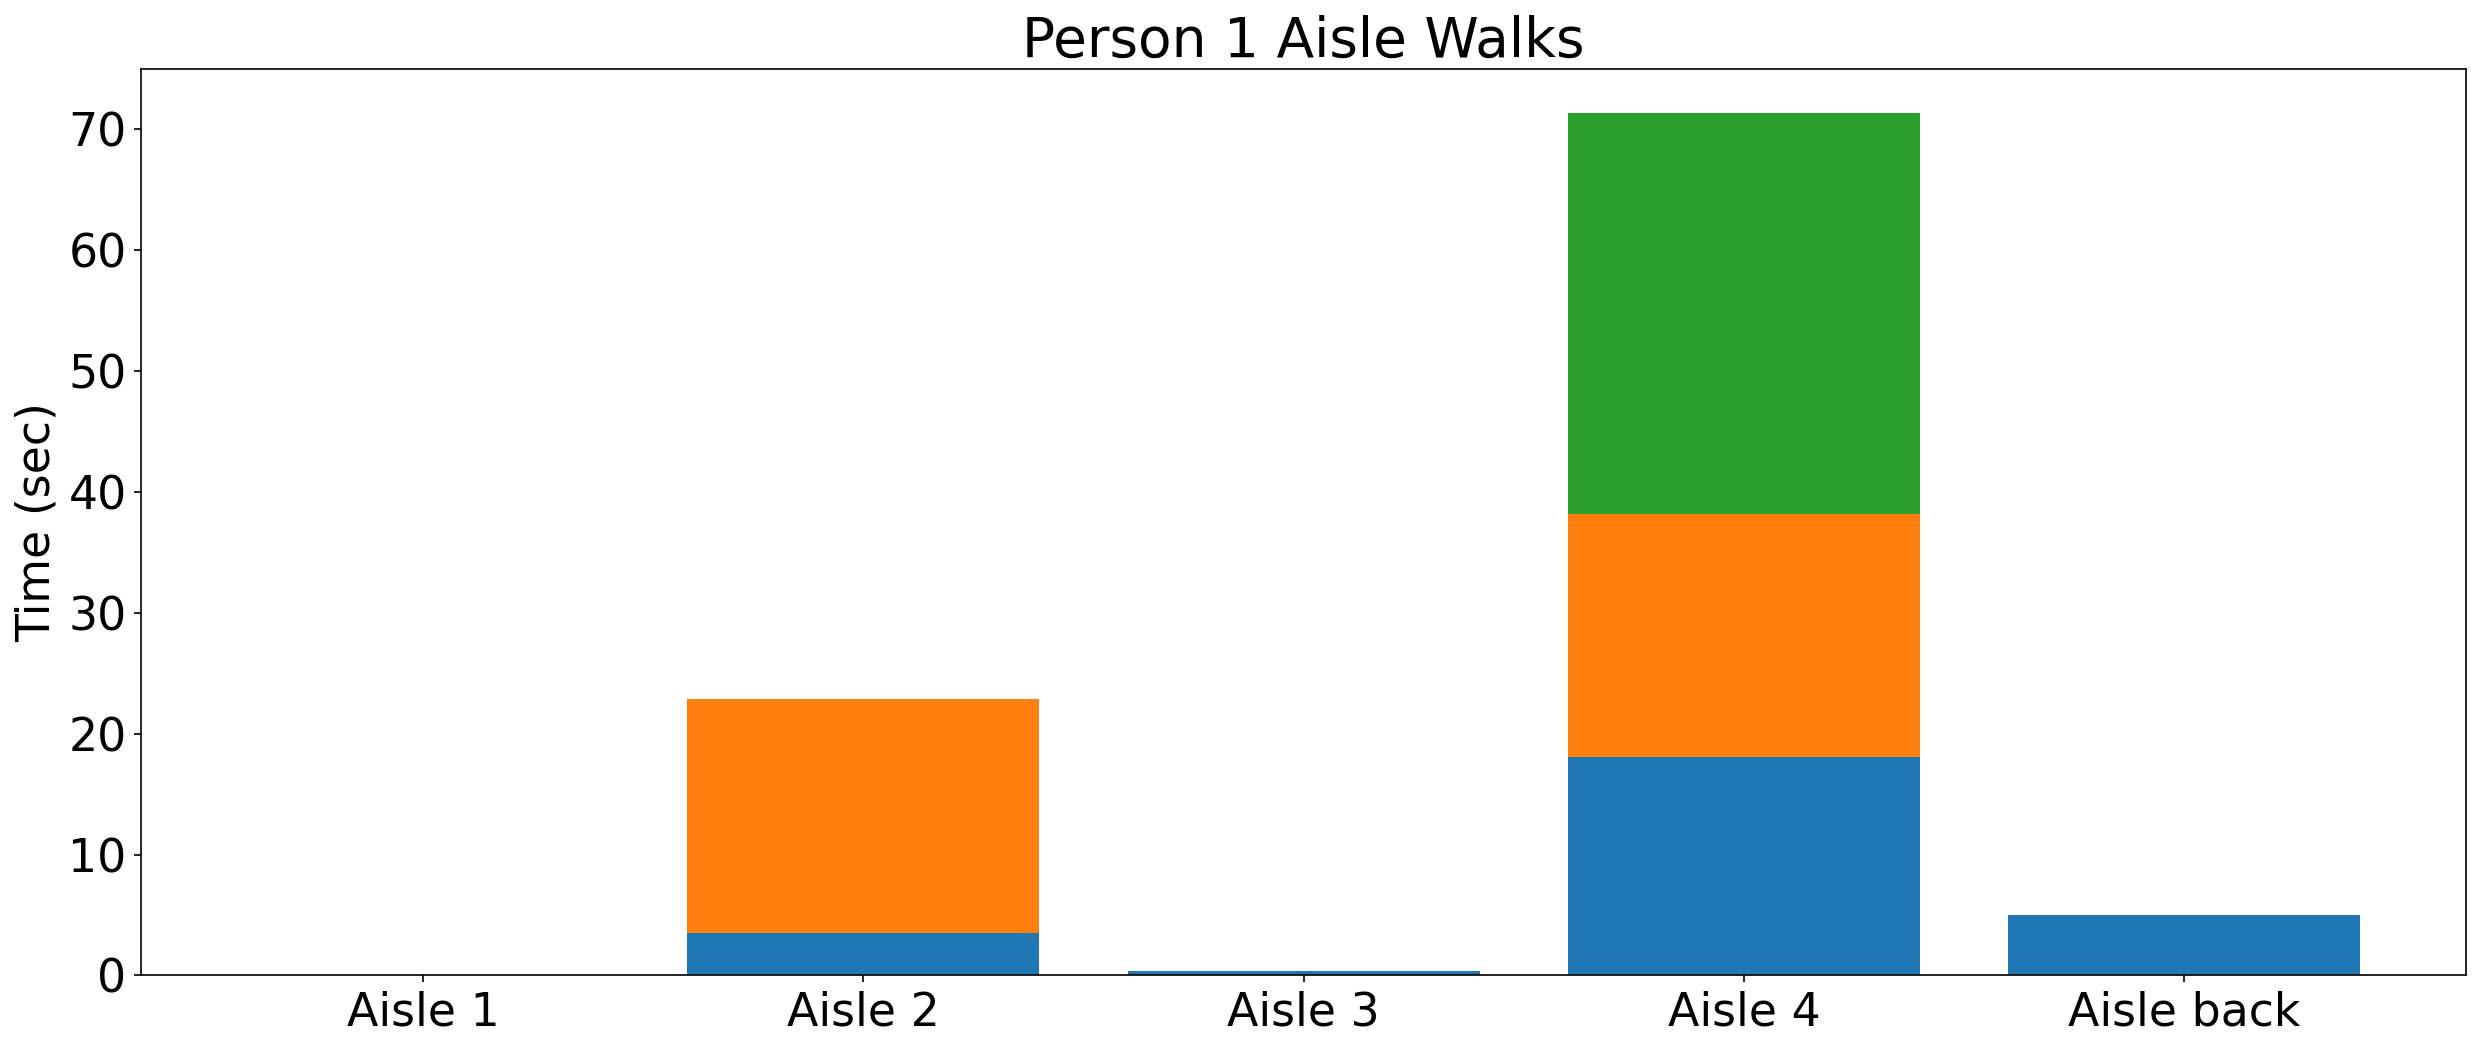

In [60]:
aisle_dict_1 = { "Aisle 1" : [0,0,0], "Aisle 2" : [3.5123269165822357, 19.351570415400204, 0], "Aisle 3" : [0.40526849037487334, 0, 0], "Aisle 4" : [18.06822019587977, 38.196555217831815, 33.164471462343805], "Aisle back" : [5.032083755488011, 0 ,0]}

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

plt.title("Person 1 Aisle Walks")
plt.ylabel("Time (sec)")
plt.bar(range(len(aisle_dict_1)), np.array(list(aisle_dict_1.values()))[:,0], bottom=0, align='center')
plt.bar(range(len(aisle_dict_1)), np.array(list(aisle_dict_1.values()))[:,1], bottom=np.array(list(aisle_dict_1.values()))[:,0], align='center')
plt.bar(range(len(aisle_dict_1)), np.array(list(aisle_dict_1.values()))[:,2], bottom=np.array(list(aisle_dict_1.values()))[:,1], align='center')
plt.xticks(range(len(aisle_dict_1)), aisle_dict_1.keys())
plt.show()

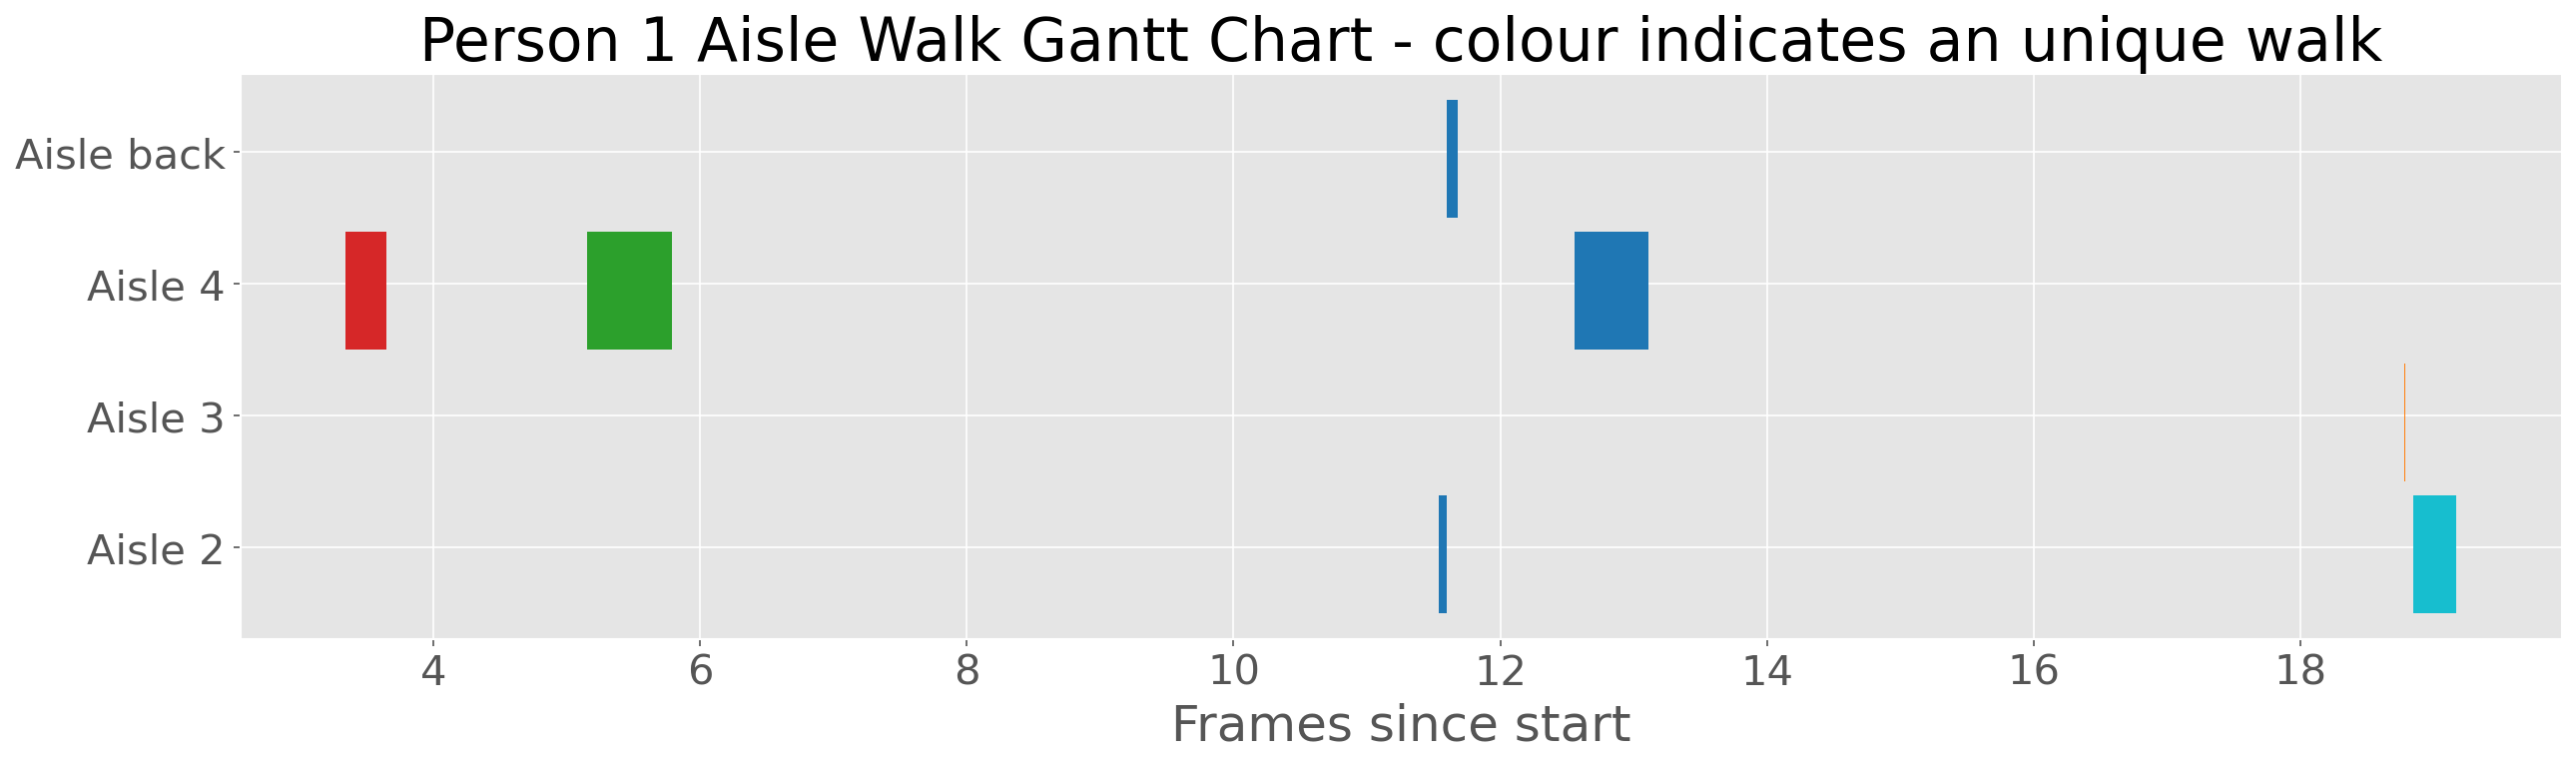

In [61]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()
ax.broken_barh([(person_1.iloc[16963]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[17066]["frame"] - person_1.iloc[16963]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[28376]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[28946]["frame"] - person_1.iloc[28376]["frame"] )/(FRAME_RATE*60.00))
                ], (10, 9), facecolors=('tab:blue','tab:cyan'))
ax.broken_barh([(person_1.iloc[28258]["frame"]/(FRAME_RATE*60.00),(person_1.iloc[28269]["frame"] - person_1.iloc[28258]["frame"] )/(FRAME_RATE*60.00))
                ], (20, 9),
               facecolors=('tab:orange'))
ax.broken_barh([(person_1.iloc[3881]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[3996]["frame"] - person_1.iloc[3881]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[6671]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[6742]["frame"] - person_1.iloc[6671]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[17216]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[18197]["frame"] - person_1.iloc[17216]["frame"] )/(FRAME_RATE*60.00))
               ], (30, 9), facecolors=('tab:red','tab:green', 'tab:blue'))
ax.broken_barh([(person_1.iloc[17067]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[17215]["frame"] - person_1.iloc[17067]["frame"] )/(FRAME_RATE*60.00))
               ], (40, 9), facecolors='tab:blue')

plt.title("Person 1 Aisle Walk Gantt Chart - colour indicates an unique walk")
ax.set_xlabel('Frames since start')
ax.set_yticks([15, 25, 35, 45], labels=['Aisle 2', 'Aisle 3', 'Aisle 4', 'Aisle back'])     # Modify y-axis tick labels

plt.show()

In [62]:
person_1.iloc[16963]["frame"]

20501

<BarContainer object of 4 artists>

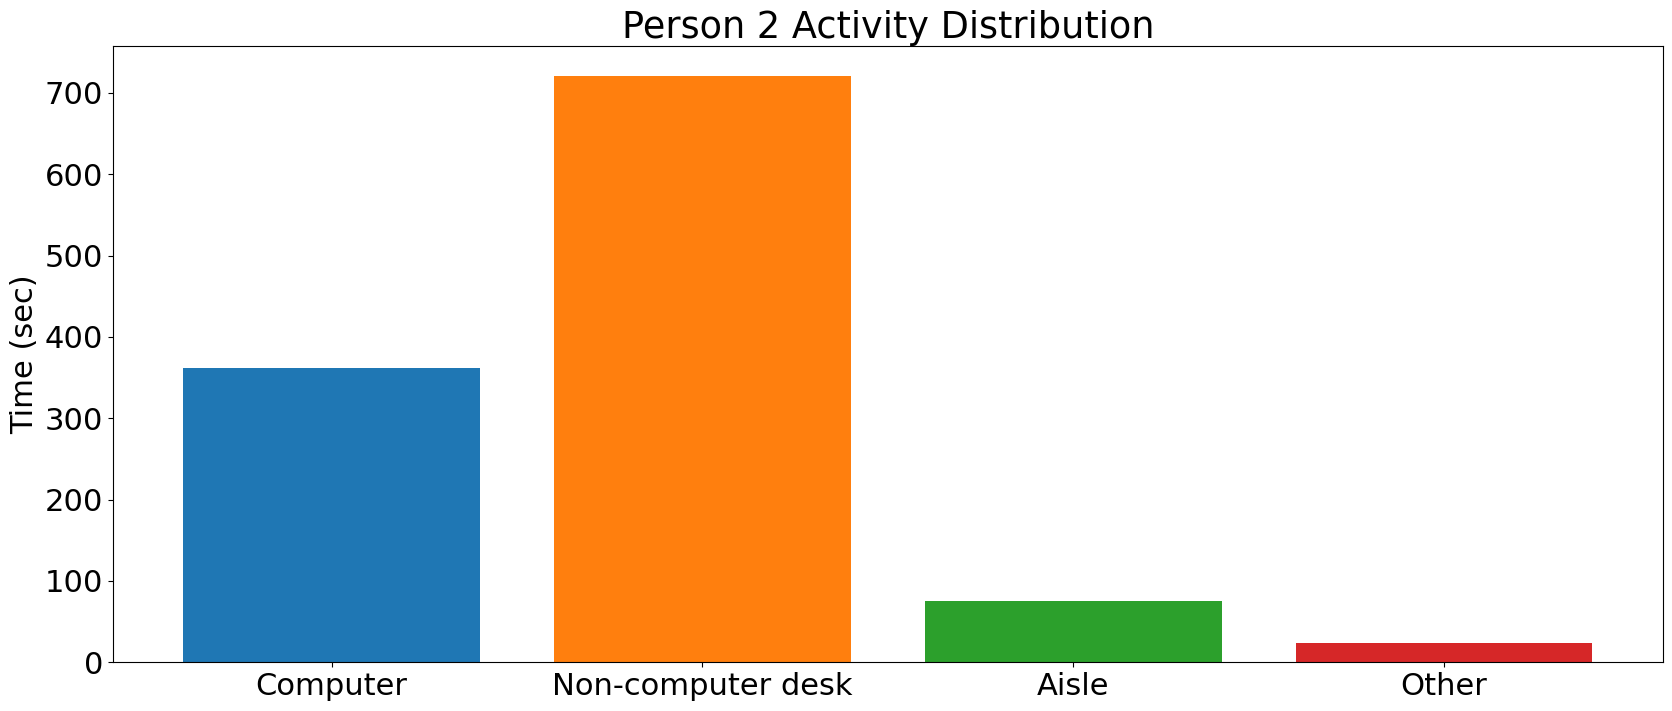

In [63]:
#Person 2 activity plots
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

frames_2 = person_2["frame"].tolist()[-1] - person_2["frame"].tolist()[0]
time_2 = 5.504896994258696 + 37.65619723066531 + 6.95710908476866 + 2.7693346842283013 + 22.0871327254306

activites_2 = ["Computer", "Non-computer desk", "Aisle", "Other"]
times_2 = [person_2["computer"].value_counts()[1]/FRAME_RATE,
           person_2["desk"].value_counts()[1]/FRAME_RATE - person_2["computer"].value_counts()[1]/FRAME_RATE,
           time_2,
          (frames_2 - person_2["desk"].value_counts()[1] - time_2*FRAME_RATE)/FRAME_RATE]
colours = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']

plt.title("Person 2 Activity Distribution")
plt.ylabel("Time (sec)")
plt.bar(activites_2, times_2, color=colours)

In [64]:
(len(person_2) - person_2["desk"].value_counts()[1] -  np.sum(np.array((5.504896994258696, 37.65619723066531, 6.95710908476866, 2.7693346842283013, 22.0871327254306)))*FRAME_RATE)/FRAME_RATE

-4.356636271529888

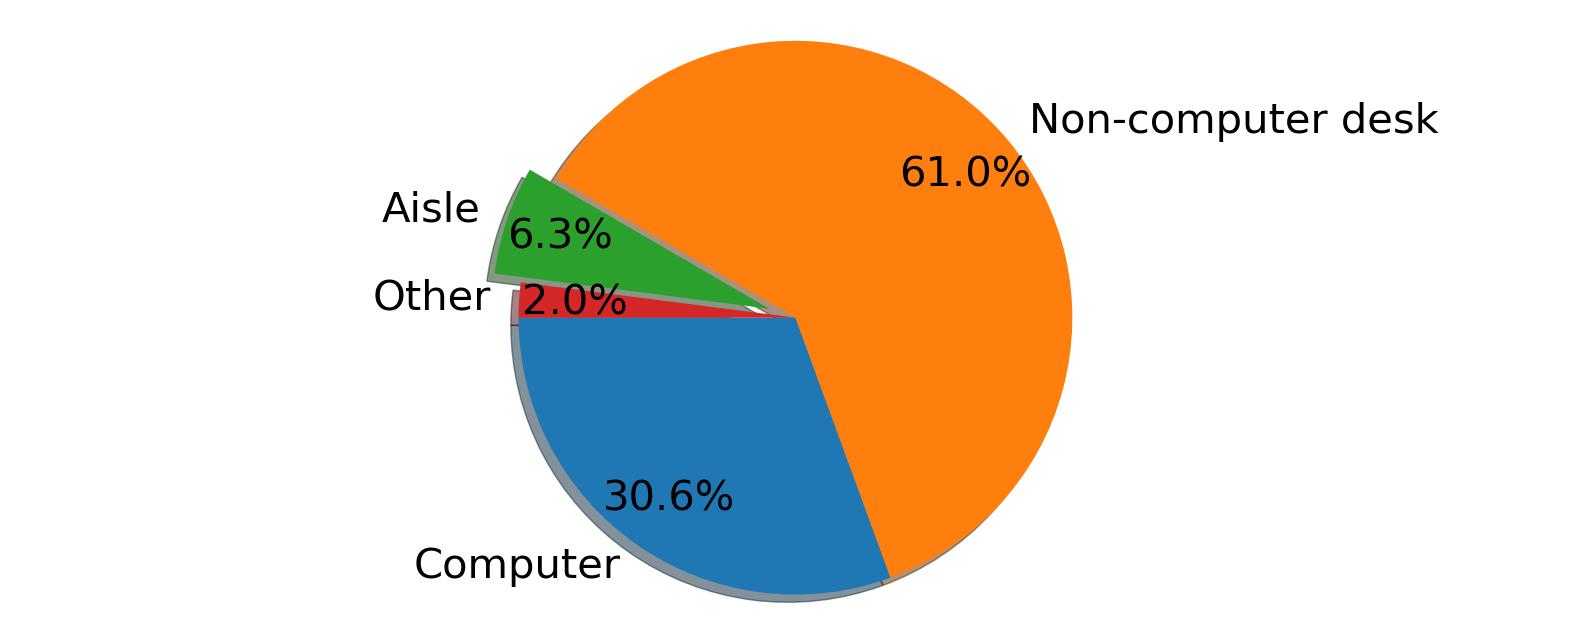

In [65]:

explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 30})

fig1, ax1 = plt.subplots()
wedges, labels, autopct = ax1.pie(times_2, explode=explode, labels=activites_2, autopct='%1.1f%%', shadow=True, startangle=180, pctdistance=0.8, labeldistance=1.1)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.




plt.show()

In [66]:
print("The total time \033[4mperson 2\033[0m spent at the desk was {:.2f} seconds of which {:.2f} seconds, or {:.2f}% of this time was spent at the computer.".format(person_2["desk"].value_counts()[1]/FRAME_RATE, person_2["computer"].value_counts()[1]/FRAME_RATE, person_2["computer"].value_counts()[1]/person_2["desk"].value_counts()[1]*100))
print("\033[4mPerson 2\033[0m had a total number of {} aisle walks which combined lasted a total of {:.2f} seconds".format(5,time_2))

The total time person 2 spent at the desk was 1082.47 seconds of which 361.30 seconds, or 33.38% of this time was spent at the computer.
Person 2 had a total number of 5 aisle walks which combined lasted a total of 74.97 seconds


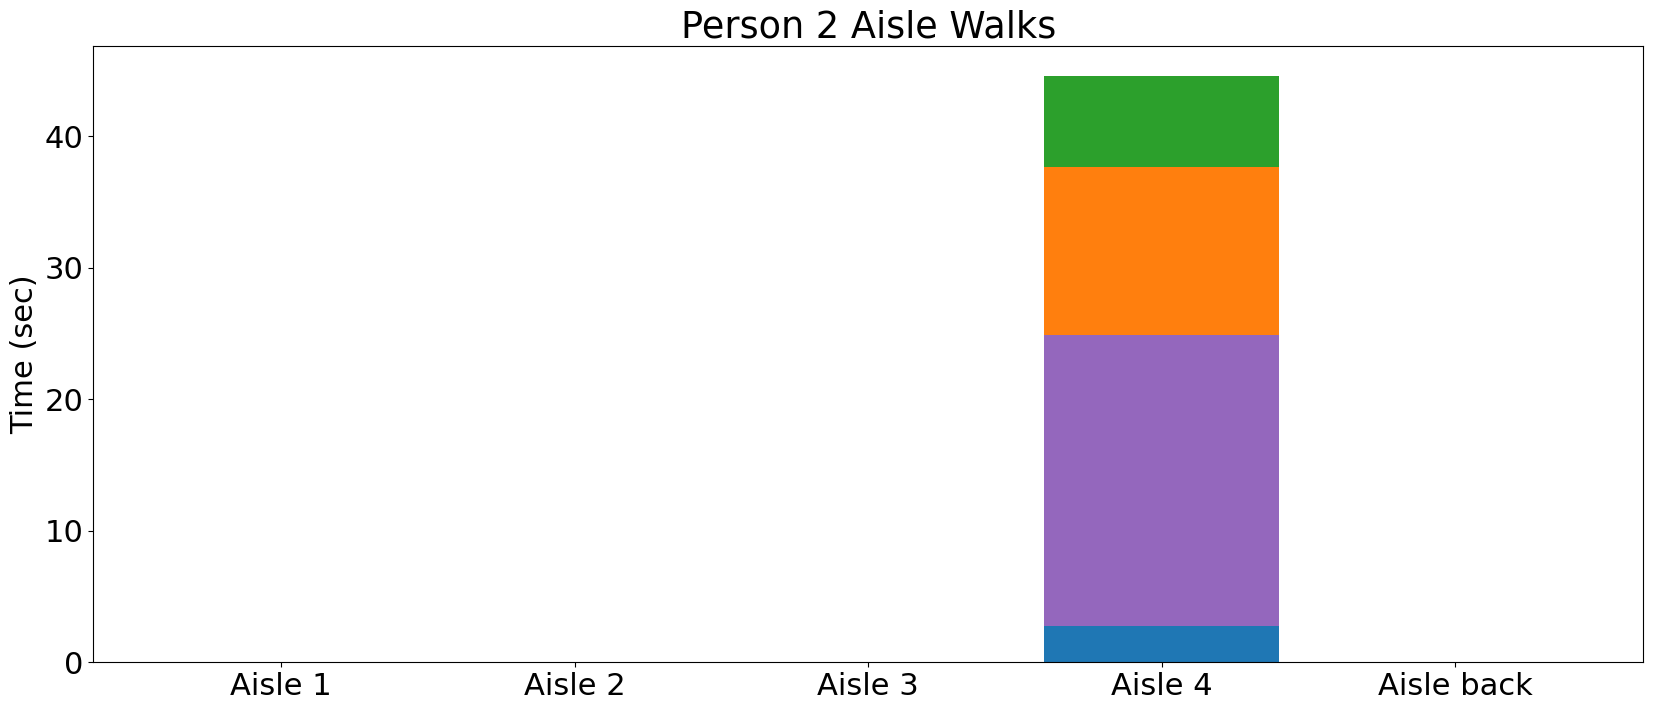

In [67]:
aisle_dict_2 = { "Aisle 1" : [0,0,0,0,0], "Aisle 2" : [0,0,0,0,0], "Aisle 3" : [0,0,0,0,0], 
                "Aisle 4" : [5.504896994258696, 37.65619723066531, 6.95710908476866, 2.7693346842283013, 22.0871327254306],
                "Aisle back" : [0,0,0,0,0]}

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

plt.title("Person 2 Aisle Walks")
plt.ylabel("Time (sec)")
plt.bar(range(len(aisle_dict_2)), np.array(list(aisle_dict_2.values()))[:,0], bottom=0, align='center')
plt.bar(range(len(aisle_dict_2)), np.array(list(aisle_dict_2.values()))[:,1], bottom=np.array(list(aisle_dict_2.values()))[:,0], align='center')
plt.bar(range(len(aisle_dict_2)), np.array(list(aisle_dict_2.values()))[:,2], bottom=np.array(list(aisle_dict_2.values()))[:,1], align='center')
plt.bar(range(len(aisle_dict_2)), np.array(list(aisle_dict_2.values()))[:,3], bottom=np.array(list(aisle_dict_2.values()))[:,2], align='center')
plt.bar(range(len(aisle_dict_2)), np.array(list(aisle_dict_2.values()))[:,4], bottom=np.array(list(aisle_dict_2.values()))[:,3], align='center')
plt.xticks(range(len(aisle_dict_2)), aisle_dict_2.keys())
plt.show()

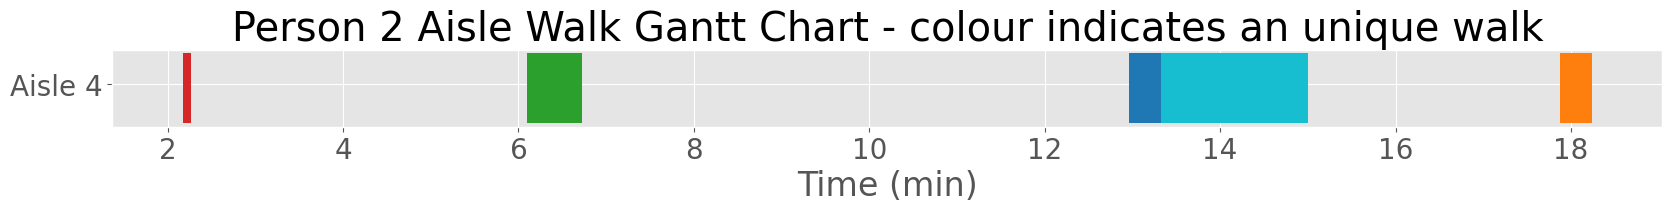

In [68]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,1)
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()

ax.broken_barh([(person_2.iloc[1729]["frame"]/(FRAME_RATE*60.00) , (person_2.iloc[1815]["frame"] - person_2.iloc[1729]["frame"] )/(FRAME_RATE*60.00)),
                (person_2.iloc[8623]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[9732]["frame"] -person_2.iloc[8623]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[20803]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21008]["frame"] - person_2.iloc[20803]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[29627]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[29529]["frame"] -person_2.iloc[29627]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[21460]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21541]["frame"] - person_2.iloc[21460]["frame"])/(FRAME_RATE*60.00))
               ], (0, 9), facecolors=('tab:red','tab:green', 'tab:blue', 'tab:orange', 'tab:cyan'))


plt.title("Person 2 Aisle Walk Gantt Chart - colour indicates an unique walk")
ax.set_xlabel('Time (min)')
ax.set_yticks([5], labels=['Aisle 4'])     # Modify y-axis tick labels

plt.show()

In [69]:
person_2.iloc[1815]["frame"] # - person_2.iloc[1729]["frame"] + 1)     )*/(FRAME_RATE*60.00)


4025

In [70]:
person_2

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk,aisle_4
0,1200,2476,2134,4,1438.79,485.40,176.15,295.97,0.85,2.0,"(1526.865, 633.385)",1526.865,633.385,True,True,False
1,1201,2478,2135,4,1438.02,485.45,175.77,295.80,0.86,2.0,"(1525.905, 633.35)",1525.905,633.350,True,True,False
2,1202,2480,2136,4,1437.67,485.45,177.55,299.30,0.86,2.0,"(1526.4450000000002, 635.1)",1526.445,635.100,True,True,False
3,1203,2482,2137,4,1437.21,485.45,177.11,299.28,0.85,2.0,"(1525.765, 635.0899999999999)",1525.765,635.090,True,True,False
4,1204,2484,2138,4,1437.35,485.44,178.10,301.48,0.86,2.0,"(1526.3999999999999, 636.1800000000001)",1526.400,636.180,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34138,35338,74631,37113,101,518.42,520.82,178.03,320.76,0.90,2.0,"(607.435, 681.2)",607.435,681.200,False,True,False
34139,35339,74633,37114,101,515.55,521.82,179.96,320.56,0.89,2.0,"(605.53, 682.1)",605.530,682.100,False,True,False
34140,35340,74635,37115,101,512.69,522.44,181.67,319.76,0.89,2.0,"(603.5250000000001, 682.32)",603.525,682.320,False,True,False
34141,35341,74637,37116,101,512.99,522.92,179.68,310.26,0.88,2.0,"(602.83, 678.05)",602.830,678.050,False,True,False


<BarContainer object of 4 artists>

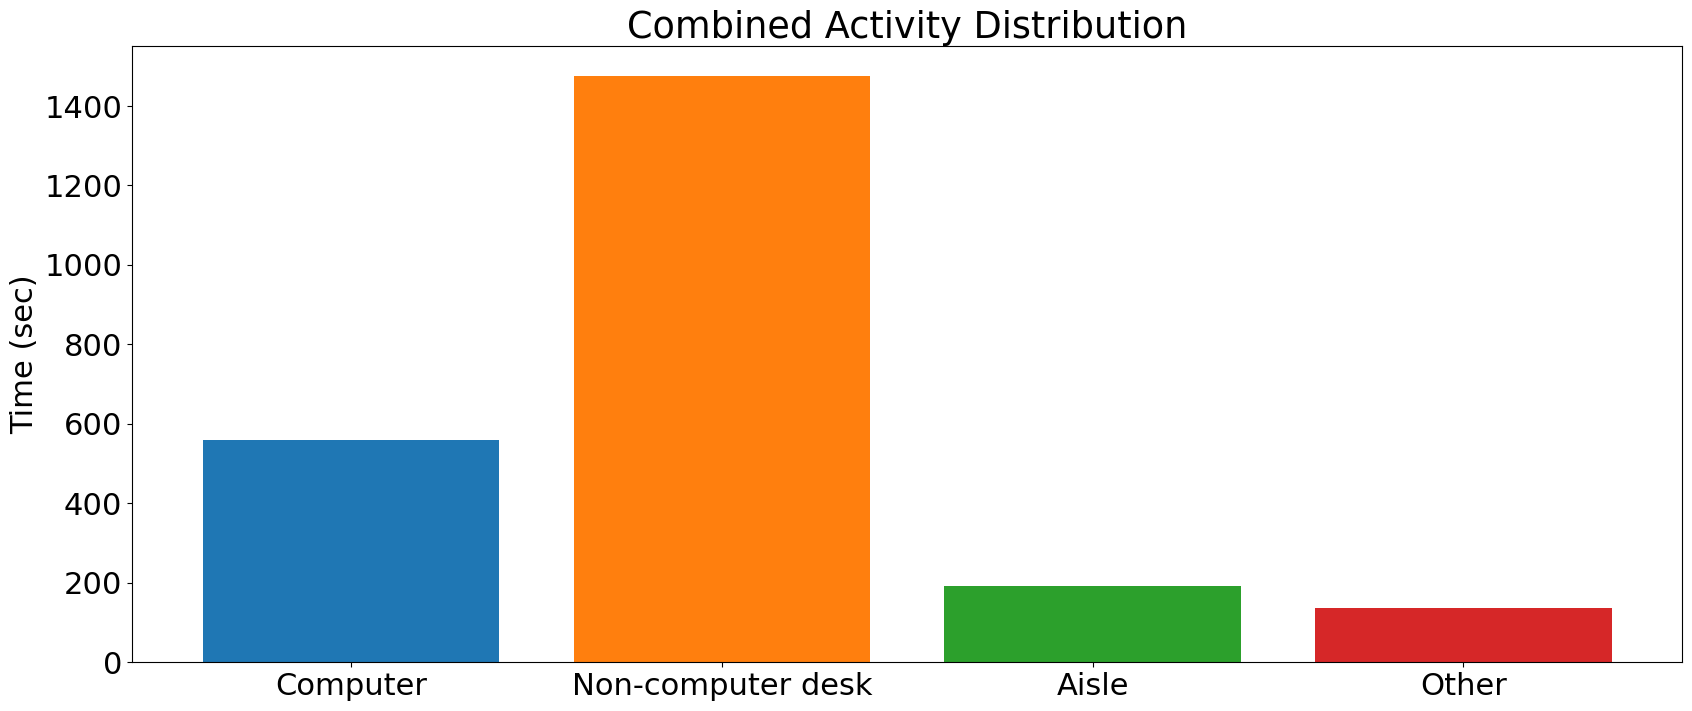

In [71]:
#Combined activity plots
plt.style.use('default')

computer = (person_1["computer"].value_counts()[1] + person_2["computer"].value_counts()[1])/FRAME_RATE
non_comp_desk = (person_1["desk"].value_counts()[1] + person_2["desk"].value_counts()[1] - person_1["computer"].value_counts()[1] - person_2["computer"].value_counts()[1])/FRAME_RATE
aisle = time_1 + time_2

activites_2 = ["Computer", "Non-computer desk", "Aisle", "Other"]
times_2 = [computer, non_comp_desk, aisle,
           (frames_1 + frames_2)/FRAME_RATE - computer - non_comp_desk - aisle]
colours = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

plt.title("Combined Activity Distribution")
plt.ylabel("Time (sec)")
plt.bar(activites_2, times_2, color=colours)

In [72]:
# (len(person_2) + len(person_1))/FRAME_RATE
-computer - non_comp_desk - aisle

-2229.1789852684906

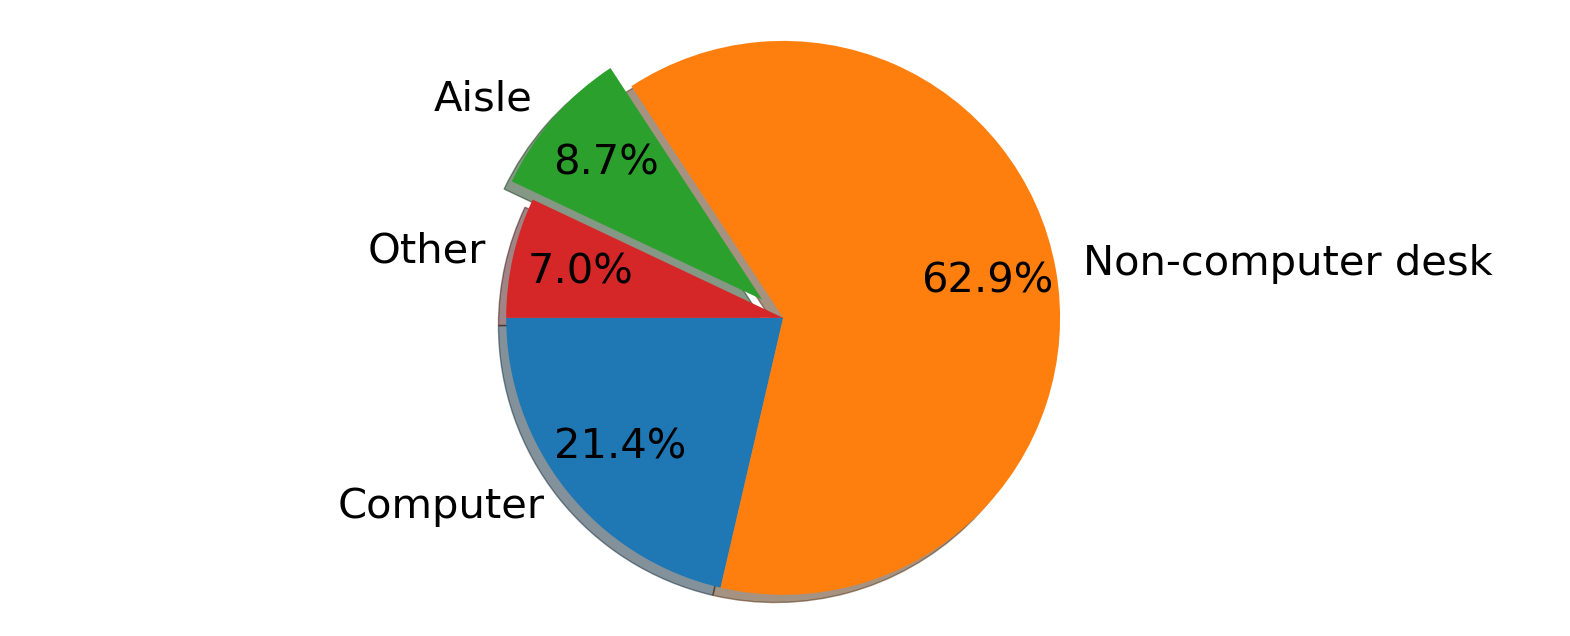

In [73]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 30})

explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(np.array(times_1) + np.array(times_2), explode=explode, labels=activites_2, autopct='%1.1f%%', pctdistance=0.75,
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [74]:
np.array(times_1) + np.array(times_2)

array([ 758.86524823, 2231.61094225,  310.43497155,  249.40967553])

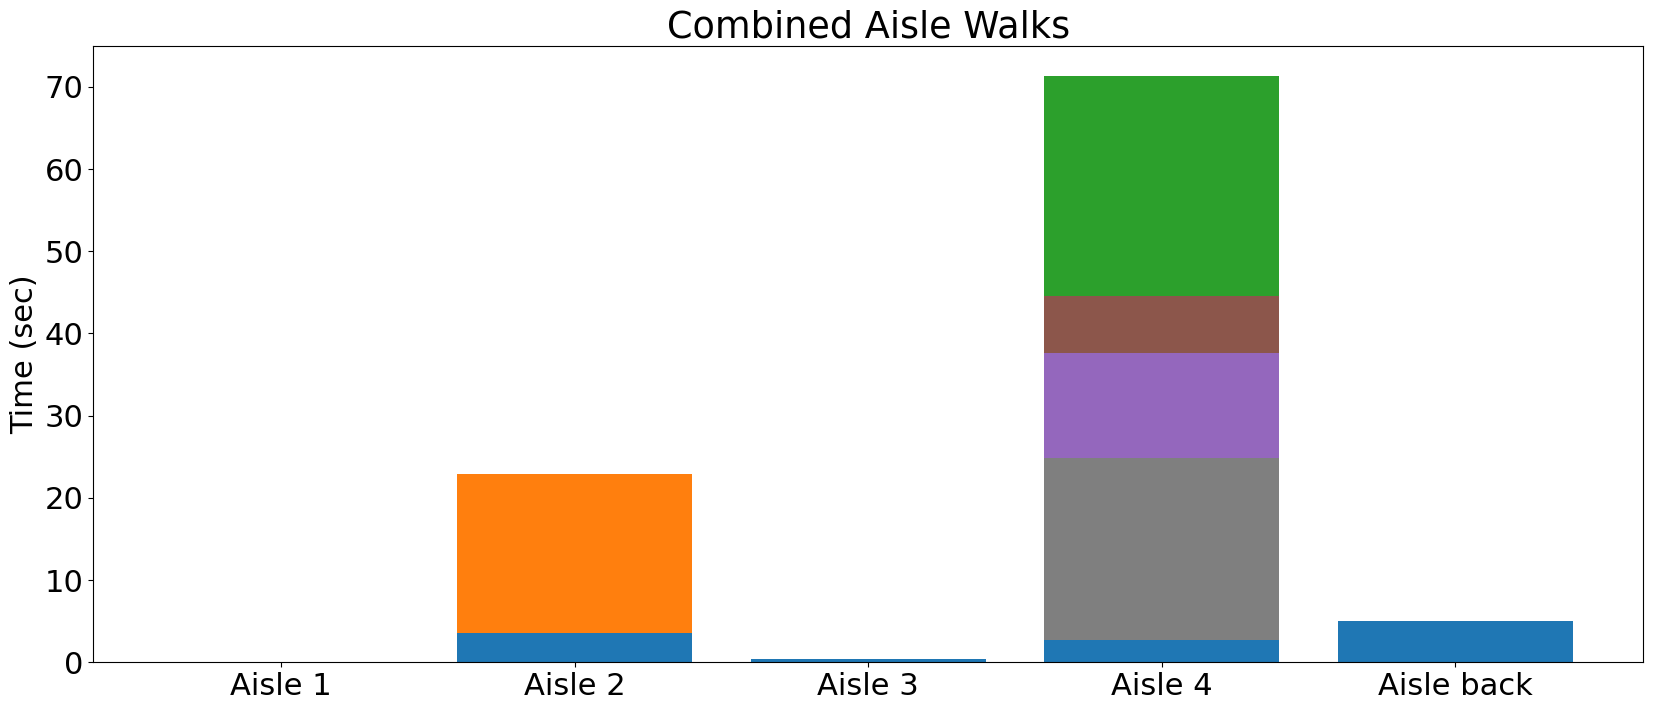

In [75]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})

aisle_dict_comb = { "Aisle 1" : [0,0,0,0,0,0,0,0],
                   "Aisle 2" : [3.5123269165822357, 19.351570415400204, 0,0,0,0,0,0],
                   "Aisle 3" : [0.40526849037487334, 0, 0,0,0,0,0,0],
                   "Aisle 4" : [18.06822019587977, 38.196555217831815, 33.164471462343805,5.504896994258696,37.65619723066531,6.95710908476866,2.7693346842283013,22.0871327254306],
                   "Aisle back" : [5.032083755488011, 0 ,0,0,0,0,0,0]}

plt.title("Combined Aisle Walks")
plt.ylabel("Time (sec)")
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,0], bottom=0, align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,1], bottom=np.array(list(aisle_dict_comb.values()))[:,0], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,2], bottom=np.array(list(aisle_dict_comb.values()))[:,1], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,3], bottom=np.array(list(aisle_dict_comb.values()))[:,2], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,4], bottom=np.array(list(aisle_dict_comb.values()))[:,3], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,5], bottom=np.array(list(aisle_dict_comb.values()))[:,4], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,6], bottom=np.array(list(aisle_dict_comb.values()))[:,5], align='center')
plt.bar(range(len(aisle_dict_comb)), np.array(list(aisle_dict_comb.values()))[:,7], bottom=np.array(list(aisle_dict_comb.values()))[:,6], align='center')
plt.xticks(range(len(aisle_dict_comb)), aisle_dict_comb.keys())
plt.show()

In [76]:

matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()
ax.broken_barh([(person_1.iloc[16963]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[17066]["frame"] - person_1.iloc[16963]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[28376]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[28946]["frame"] - person_1.iloc[28376]["frame"] )/(FRAME_RATE*60.00))
                ], (10, 9), facecolors=('tab:blue','tab:cyan'))
ax.broken_barh([(person_1.iloc[28258]["frame"]/(FRAME_RATE*60.00),(person_1.iloc[28269]["frame"] - person_1.iloc[28258]["frame"] )/(FRAME_RATE*60.00))
                ], (20, 9),
               facecolors=('tab:orange'))
ax.broken_barh([(person_1.iloc[3881]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[3996]["frame"] - person_1.iloc[3881]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[6671]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[6742]["frame"] - person_1.iloc[6671]["frame"] )/(FRAME_RATE*60.00)),
                (person_1.iloc[17216]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[18197]["frame"] - person_1.iloc[17216]["frame"] )/(FRAME_RATE*60.00)),
                (person_2.iloc[1729]["frame"]/(FRAME_RATE*60.00) , (person_2.iloc[1815]["frame"] - person_2.iloc[1729]["frame"] )/(FRAME_RATE*60.00)),
                (person_2.iloc[8623]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[9732]["frame"] -person_2.iloc[8623]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[20803]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21008]["frame"] - person_2.iloc[20803]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[29627]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[29529]["frame"] -person_2.iloc[29627]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[21460]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21541]["frame"] - person_2.iloc[21460]["frame"])/(FRAME_RATE*60.00))
               ], (30, 9), facecolors=('tab:red','tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray','tab:olive'))
ax.broken_barh([(person_1.iloc[17067]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[17215]["frame"] - person_1.iloc[17067]["frame"] )/(FRAME_RATE*60.00))
               ], (40, 9), facecolors='tab:blue')

plt.title("Combined Aisle Walk Gantt Chart - colour indicates an unique walk")
ax.set_xlabel('Time (min)')
ax.set_yticks([15, 25, 35, 45], labels=['Aisle 2', 'Aisle 3', 'Aisle 4', 'Aisle back'])     # Modify y-axis tick labels

plt.show()

NameError: name 'matplotlib' is not defined

In [ ]:
import matplotlib
matplotlib.style.use('default')

In [ ]:

fig, ax = plt.subplots()

ax.broken_barh([(person_2.iloc[1729]["frame"]/(FRAME_RATE*60.00) , (person_2.iloc[1815]["frame"] - person_2.iloc[1729]["frame"] )/(FRAME_RATE*60.00)),
                (person_2.iloc[8623]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[9732]["frame"] -person_2.iloc[8623]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[20803]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21008]["frame"] - person_2.iloc[20803]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[29627]["frame"]/(FRAME_RATE*60.00), (person_2.iloc[29529]["frame"] -person_2.iloc[29627]["frame"])/(FRAME_RATE*60.00)),
                (person_2.iloc[21460]["frame"]/(FRAME_RATE*60.00), (person_1.iloc[21541]["frame"] - person_2.iloc[21460]["frame"])/(FRAME_RATE*60.00))
               ], (0, 9), facecolors=('tab:red','tab:green', 'tab:blue', 'tab:orange', 'tab:cyan'))


plt.title("Person 2 Aisle Walk Gantt Chart - colour indicates an unique walk")
ax.set_xlabel('Time (min)')
ax.set_yticks([5], labels=['Aisle 4'])     # Modify y-axis tick labels

plt.show()

In [ ]:
print("The total time \033[4mperson 1\033[0m spent at the desk was {:.2f} seconds of which {:.2f} seconds, or {:.2f}% of this time was spent at the computer.".format((person_1["desk"].value_counts()[1]+person_2["desk"].value_counts()[1])/FRAME_RATE, (person_1["computer"].value_counts()[1]+person_2["computer"].value_counts()[1])/FRAME_RATE, (person_1["computer"].value_counts()[1]+person_2["computer"].value_counts()[1])/(person_1["desk"].value_counts()[1]+person_2["desk"].value_counts()[1])*100))
print("\033[4mPerson 1\033[0m had a total number of {} aisle walks which combined lasted a total of {:.2f} seconds".format(10, 3.5123 + 19.351570415400204 + 0.40526 + 18.068+38.19655+33.16447+5.032 +  5.504896994258696 +
           37.65619723066531 +
           6.95710908476866 +
           2.7693346842283013 +
           22.0871327254306))

In [ ]:
(person_2.iloc[21008]["frame"], person_2.iloc[21460]["frame"])

In [ ]:
aisle_perc = {"aisle1" : 0, "aisle2" : 0, "aisle3" : 0, "aisle4" : sum(count_aisle_4_2)}
aisle_perc.keys()

In [ ]:
#Person_1
#Time not in camera
actual_frames = len(person_1)
total_frames = person_1["frame"].iloc[-1] - person_1["frame"].iloc[0]

#Percentage not recorded
(total_frames - actual_frames ) / total_frames * 100

In [ ]:
#Person_2
#Time not in camera
actual_frames = len(person_2)
total_frames = person_2["frame"].iloc[-1] - person_2["frame"].iloc[0]

#Percentage not recorded
(total_frames - actual_frames ) / total_frames * 100

In [ ]:
#convert index numbers into frame numbers
frames_1 = []
for i in a_dict_1.values():
    walk = []
    for j in i:
        walk.append(int(person_1.iloc[[j]]["frame"]))
    frames_1.append(walk)

frames_2 = []
for i in a_dict_2.values():
    walk = []
    for j in i:
        walk.append(int(person_2.iloc[[j]]["frame"]))
    frames_2.append(walk)


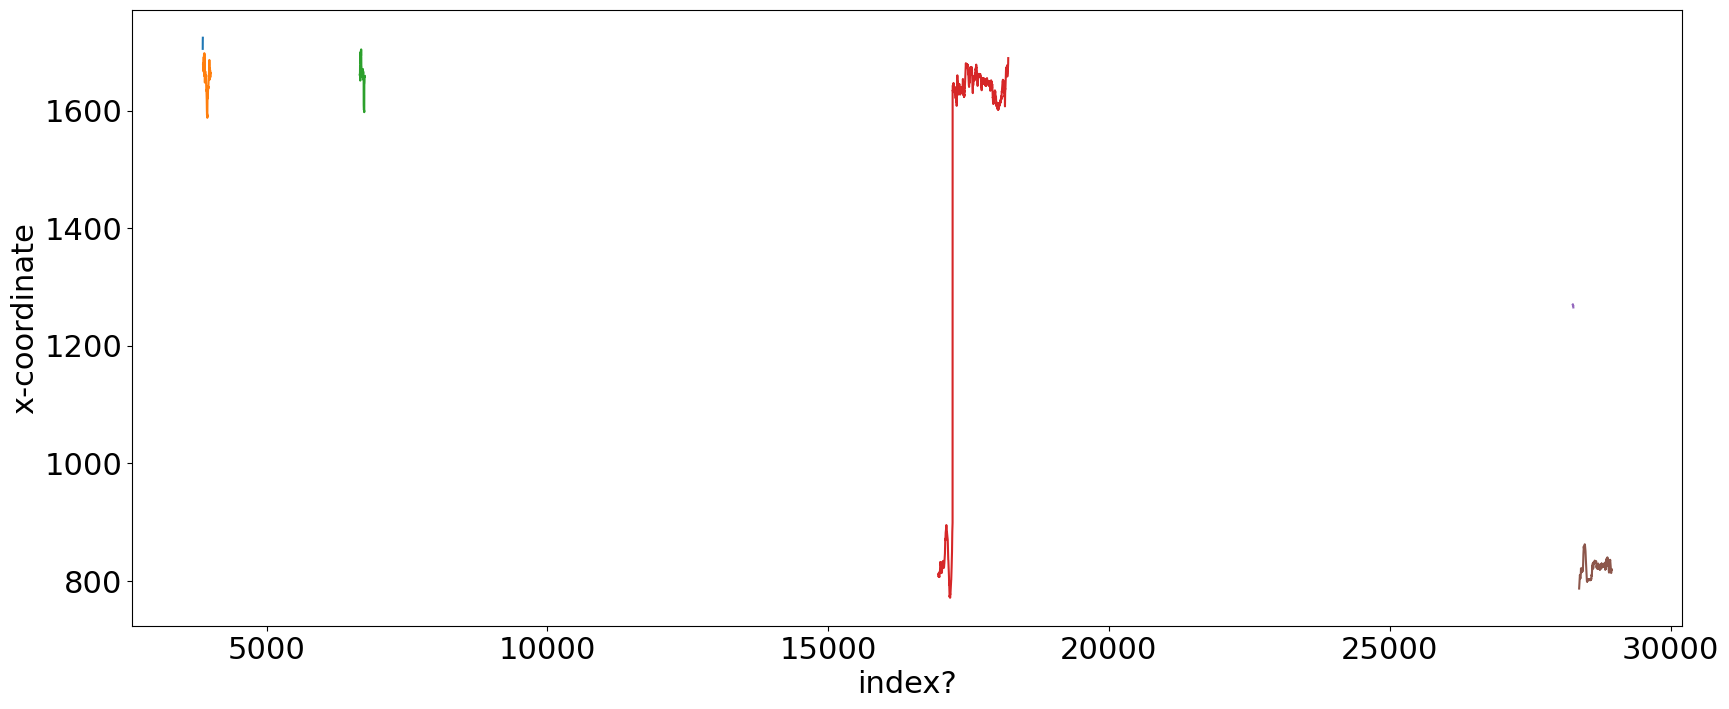

In [77]:
#Plot x-coordinates of aisle walks

plt.xlabel("index?")
plt.ylabel("x-coordinate")
for i in range(len(a_dict_1)):
    thing = person_1[min(a_dict_1[i+1]):max(a_dict_1[i+1])]
    plt.plot(thing["x"])

In [ ]:
plt.xlabel("index?")
plt.ylabel("x-coordinate")
for i in range(len(a_dict_2)):
    thing = person_2[min(a_dict_2[i+1]):max(a_dict_2[i+1])]
    plt.plot(thing["x"])

In [ ]:
aisle_walk_1 = person_2[min(a_dict_2[1]):max(a_dict_2[1])]

plt.plot(aisle_walk_1["x"])

In [ ]:
#Aisle walk time

aisle_1

In [ ]:
person_1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
matplotlib.style.use('ggplot')
from pandas import DataFrame
weather = ('Day', 'Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
colors = sns.color_palette("cubehelix", n_colors=len(weather))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
data1 = [["M", 66386, 174296, 75131, 577908, 32015],
         ["T", 58230, 381139, 78045, 99308, 160454],
         ["W", 89135, 80552, 152558, 497981, 603535],
         ["T", 78415, 81858, 150656, 193263, 69638],
         ["F", 139361, 331509, 343164, 781380, 52269]]
df = DataFrame(data=data1)
df.columns = weather
df = df.set_index('Day')
df.plot(kind='bar', stacked=True, colormap=cmap1)
plt.show()

In [ ]:
#Collisions and contacts

(len(person_1), len(person_2))

In [ ]:
df_collision = pd.DataFrame(person_2["frame"])
df_collision.rename(columns = {"frame" : "frame 1"})

df_collision_2 = pd.DataFrame(person_1["frame"])
df_collision_2.rename(columns = {"frame" : "frame 2"})

df_collision.join(df_collision_2, )

In [ ]:
df_collision

In [ ]:
matplotlib.style.use('default')

In [ ]:
a_dict_1[1]

In [ ]:
frames_1

In [ ]:
#Transformation
H = np.array([[ 1.05278912e+00 , 3.68006799e-01, -7.05496230e+02],
 [ 4.03594194e-02 , 1.02726776e+00, -1.35568230e+02],
 [-4.88941331e-06,  5.97119721e-04,  1.00000000e+00]])

person_1["trans_position"] = [np.matmul(H, person_1["position"][i]) for i in range(len(person_1))]

In [ ]:
person_1["transposition2"] = person_1["position"].apply(lambda x: np.asarray(np.matmul(H,x)))

In [ ]:
from powerbiclient import Report, models

# Huboo Hub: A Saige Analysis 
Here we provide an example of the type of information that Saige can provide based on our computer vision tracking system. Let is serve as an illistration of the type of data and information that could be provided to you through an SDK/API, or some via other means. 

For clarity, we state what the report is based on. At the Huboo facilty in Leipzig, on 01.11.22 we filmed the operation of a single picking-and-packing hub for approximately 20 minute. There were two people[<sup>1</sup>](#fn1) picking-and-packing at this hub for the duration of the filming, and it is their movement and actions that were analysed. 


[<sup id="fn1">1</sup>](#fn1-back) Anonymised.

DISCLAIMER:This information was kept private and not shown or given to any third party.

## How it works

Our computer vision tracking system, which we dubbed _kiCortex_, was trained on millions of datapoints and is able to identify humans from an image or video with extreme accuracy. It identifies all parts of the body; arms, legs, head _etc._ and constructs a bounding box around the entire person, including those parts of the image which are not directly visible. It can do this because it understands that a human body requires all these parts. We can see an example of this in action here:


![title](C:\Projects\huboo\data\huboo_hub.png)